# Meta analysis of all sessions

In [1]:
import sys
import os as os
import numpy as np
try:
    import cPickle as pickle
except:
    import pickle as pkl

import scipy as scipy
import scipy.io as spio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
from scipy.io.matlab import mat_struct
import pickle
import random
random.seed(666)

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=True, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], scipy.io.matlab.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, scipy.io.matlab.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [2]:
import scipy.stats as stats

In [3]:
s = [45,46,11,13,14,19,20]
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']

## Morning blocks analysis

### Accuracy

In [6]:
acc_ab_svm = []
acc_ab_bayes = []
acc_sbl_svm = []
acc_sbl_bayes = []

In [7]:
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\S{Session}\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)
        acc_ab_svm.append(classifiers_results['svm']['acc_ab'])
        acc_ab_bayes.append(classifiers_results['bayes']['acc_ab'])
        acc_sbl_svm.append(classifiers_results['svm']['acc_sb'])
        acc_sbl_bayes.append(classifiers_results['bayes']['acc_sb'])

In [8]:
acc_ab_svm = np.array(acc_ab_svm)
acc_ab_bayes = np.array(acc_ab_bayes)
acc_sbl_svm = np.array(acc_sbl_svm)
acc_sbl_bayes = np.array(acc_sbl_bayes)

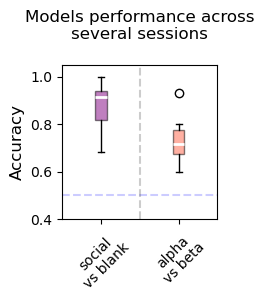

In [9]:
# Sample data
data = [acc_sbl_svm, acc_ab_svm]
labels = ['social\nvs blank', 'alpha\nvs beta']
colors = ['#800080', '#FF6347']

# Create the box plot
plt.figure(figsize=(2,2))
boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)

# Add titles and labels
plt.title('Models performance across\nseveral sessions\n')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.4, 1.05)
plt.xticks([1, 2], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\svm_acc_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [10]:
for dat in [acc_sbl_svm, acc_ab_svm]:
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(dat, 'norm')
    if p > 0.05:
        print(f'Distr is normal, p = {p:.3f}')
    else:
        print(f"Dist is NOT normal, p = {p:.3f}")

Dist is NOT normal, p = 0.000
Dist is NOT normal, p = 0.000


In [11]:
# Mann-Whitney U Test
stat, p = stats.mannwhitneyu(acc_sbl_svm, acc_ab_svm)

if p > 0.05:
    print(f"p = {p:.3f}, No significant difference between samples.")
else:
    print(f"p = {p:.3f}, Significant difference between samples.")

p = 0.073, No significant difference between samples.


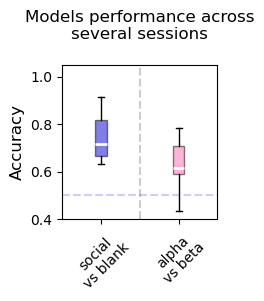

In [16]:
# Sample data
data = [acc_sbl_bayes, acc_ab_bayes]
labels = ['social\nvs blank', 'alpha\nvs beta']
colors = ['#0000CD', '#FF69B4']

# Create the box plot
plt.figure(figsize=(2,2))
boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)

# Add titles and labels
plt.title('Models performance across\nseveral sessions\n')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.4, 1.05)
plt.xticks([1, 2], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\bayes_acc_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [83]:
# Mann-Whitney U Test
stat, p = stats.mannwhitneyu(acc_sbl_bayes, acc_ab_bayes)
print(f"Mann-Whitney U Test: U={stat}, p={p}")

if p > 0.05:
    print("No significant difference between samples.")
else:
    print("Significant difference between samples.")

Mann-Whitney U Test: U=39.5, p=0.06333570382557177
No significant difference between samples.


**Kruskal-Wallis Test:** If the ANOVA assumptions (*normality, homogeneity of variances, independence of observations*) are not met, use the Kruskal-Wallis test, a non-parametric alternative that doesn’t assume normal distribution.

In [75]:
# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(data[0], data[1], data[2], data[3])
if p > 0.05:
    print(f"No difference, p = {p_value:.3f}")
else:
    print(f"There is a difference, p = {p_value:.3f}")

There is a difference, p = 0.015


**Post-Hoc Tests:** If you find significant differences with ANOVA or Kruskal-Wallis, use post-hoc tests to determine which specific groups differ.

- Tukey’s HSD (Honestly Significant Difference): For ANOVA, to compare all pairs of means.
- **Dunn’s Test:** For Kruskal-Wallis, to perform pairwise comparisons.


In [76]:
# conda install -c conda-forge scikit-posthocs : put it in command line!!!
import scikit_posthocs as sp

In [77]:
dff = np.concatenate(data)
groups = ['svm_sb']*len(data[0]) + ['bayes_sb']*len(data[1]) + ['svm_ab']*len(data[2]) + ['bayes_ab']*len(data[3])
df = pd.DataFrame({'value': dff, 'group': groups})

In [78]:
# Perform Dunn's test
dunn_results = sp.posthoc_dunn(df, val_col='value', group_col='group', p_adjust='bonferroni')
print(dunn_results)

          bayes_ab  bayes_sb    svm_ab    svm_sb
bayes_ab  1.000000  0.712034  1.000000  0.007311
bayes_sb  0.712034  1.000000  1.000000  0.564610
svm_ab    1.000000  1.000000  1.000000  0.383346
svm_sb    0.007311  0.564610  0.383346  1.000000


In [80]:
alpha = 0.5
dunn_results < alpha

,bayes_ab,bayes_sb,svm_ab,svm_sb
bayes_ab,False,False,False,True
bayes_sb,False,False,False,False
svm_ab,False,False,False,True
svm_sb,True,False,True,False


#### Significance of predictions

In [51]:
# classifiers_results['svm'] = {'acc_ab':acc_svm_ab, 'acc_sh_ab':acc_sh_ab, 'pval_ab':p_value_ab, 
#                               acc_sb':acc_svm_sb, 'acc_sh_sb':acc_sh_sb, 'pval_sb':p_value_sb}

# classifiers_results['bayes'] = {'acc_ab':acc_bayes_ab, 'acc_sh_ab':acc_sh_bayes_ab,'pval_ab':p_value_bayes_ab,
                                # 'acc_sb':acc_bayes_sb, 'acc_sh_sb':acc_sh_bayes_sb, 'pval_sb':p_value_bayes_sb}

In [14]:
p_ab_svm = []
p_ab_bayes = []
p_sbl_svm = []
p_sbl_bayes = []

In [15]:
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\S{Session}\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)
        p_ab_svm.append(classifiers_results['svm']['pval_ab'])
        p_ab_bayes.append(classifiers_results['bayes']['pval_ab'])
        p_sbl_svm.append(classifiers_results['svm']['pval_sb'])
        p_sbl_bayes.append(classifiers_results['bayes']['pval_sb'])

In [16]:
p_ab_svm = np.array(p_ab_svm)
p_ab_bayes = np.array(p_ab_bayes)
p_sbl_svm = np.array(p_sbl_svm)
p_sbl_bayes = np.array(p_sbl_bayes)

In [21]:
p_sbl_svm

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02])

In [20]:
p_ab_svm

array([0.    , 0.006 , 0.    , 0.0985, 0.035 , 0.0155, 0.    ])

In [17]:
np.sum(p_ab_svm<0.05)

6

In [18]:
whats = ['p_ab_svm', 'p_ab_bayes', 'p_sbl_svm', 'p_sbl_bayes']
colors = [ '#FF6347', '#FF69B4', '#800080', '#0000CD'] # '#808080' - grey
sets = [p_ab_svm, p_ab_bayes, p_sbl_svm, p_sbl_bayes]

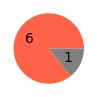

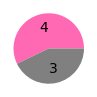

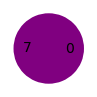

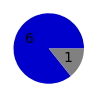

In [19]:
for i, set in enumerate(sets):
    what = whats[i]
    plt.figure(figsize=(1,1))
    # Data to plot
    sizes = [np.sum(set<0.05),(7-np.sum(set<0.05))]
    colorss = [colors[i], '#808080']

    def absolute_value(val):
        a  = int(val/100.*sum(sizes))
        return a

    # Plot
    plt.pie(sizes, autopct=absolute_value, colors=colorss)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\pie_{what}.png', dpi=300, bbox_inches='tight')
    plt.show()

### MD summary

In [37]:
MD_matrices = []
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\populational_anal\\{mouse}_S{Session}_MD_matrix.pkl', 'rb') as f:
        MD_matrix = pickle.load(f)
        MD_matrices.append(MD_matrix)

In [38]:
MD_npoke_all_sessions = np.zeros((7,3,3))
for ses in range(len(MD_matrices)):
    MD_npoke_all_sessions[ses,:,:] = MD_matrices[ses]

In [39]:
MD_npoke_all_sessions.shape

(7, 3, 3)

In [40]:
MD_npoke_mean = np.mean(MD_npoke_all_sessions, axis=0)
MD_npoke_mean

array([[0.56285414, 0.68923184, 1.71976541],
       [0.70337146, 0.42565875, 1.86767977],
       [1.49589641, 1.64717227, 0.97180219]])

In [41]:
import seaborn as sns
import math

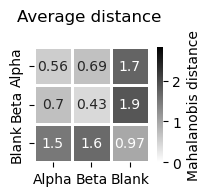

In [42]:
plt.figure(figsize=(2,1.5))

labels = ['Alpha', 'Beta', 'Blank']

# Create the heatmap
sns.heatmap(MD_npoke_mean, annot=MD_npoke_mean, cmap='binary', cbar_kws={'label': 'Mahalanobis distance'}, linewidths=1, linecolor='white', square=True, vmin=0, vmax=math.sqrt(8))

# # Customize the heatmap
plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=0)
plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=90)

plt.title('Average distance \n')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\populational_anal\\mean_MD_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Surprize

In [3]:
s = np.array([45,46,11,13,14,19,20])
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']

In [4]:
i_d_results_all = []
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\{mouse}_S{Session}_surprize.pkl', 'rb') as f:
        i_d_results = pickle.load(f)
        i_d_results_all.append(i_d_results)

In [5]:
PSTH_dic_all = []
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\{mouse}_S{Session}_PSTH_dic.pkl', 'rb') as f:
        PSTH_dic = pickle.load(f)
        PSTH_dic_all.append(PSTH_dic)

In [6]:
i_d_results_all

[{'i': {'only_in_beta': 3,
   'only_in_alpha': 2,
   'only_in_blank': 5,
   'in_beta_and_alpha': 0,
   'in_alpha_and_blank': 0,
   'in_beta_and_blank': 0,
   'in_all_three': 0},
  'd': {'only_in_beta': 1,
   'only_in_alpha': 0,
   'only_in_blank': 2,
   'in_beta_and_alpha': 2,
   'in_alpha_and_blank': 1,
   'in_beta_and_blank': 0,
   'in_all_three': 3}},
 {'i': {'only_in_alpha': 1,
   'only_in_beta': 1,
   'only_in_blank': 3,
   'in_alpha_and_beta': 0,
   'in_beta_and_blank': 0,
   'in_alpha_and_blank': 0,
   'in_all_three': 0},
  'd': {'only_in_alpha': 1,
   'only_in_beta': 1,
   'only_in_blank': 2,
   'in_alpha_and_beta': 0,
   'in_beta_and_blank': 0,
   'in_alpha_and_blank': 0,
   'in_all_three': 4}},
 {'i': {'only_in_beta': 1,
   'only_in_alpha': 0,
   'only_in_blank': 1,
   'in_beta_and_alpha': 1,
   'in_alpha_and_blank': 1,
   'in_beta_and_blank': 0,
   'in_all_three': 0},
  'd': {'only_in_beta': 2,
   'only_in_alpha': 5,
   'only_in_blank': 0,
   'in_beta_and_alpha': 2,
   'in_a

In [7]:
# session 11
ses=11
ses_idx = np.where(s==ses)[0][0]

n_cells = len(PSTH_dic_all[ses_idx][1]['Pi_poi'])
n_cells

40

In [8]:
i_d_results_all[ses_idx]

{'i': {'only_in_beta': 1,
  'only_in_alpha': 0,
  'only_in_blank': 1,
  'in_beta_and_alpha': 1,
  'in_alpha_and_blank': 1,
  'in_beta_and_blank': 0,
  'in_all_three': 0},
 'd': {'only_in_beta': 2,
  'only_in_alpha': 5,
  'only_in_blank': 0,
  'in_beta_and_alpha': 2,
  'in_alpha_and_blank': 1,
  'in_beta_and_blank': 1,
  'in_all_three': 5}}

In [9]:
from matplotlib_venn import venn2, venn3

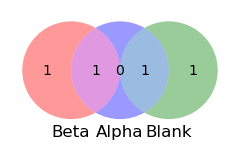

In [29]:
iord = 'i'
# Define the subset sizes
# Order: (100, 010, 110, 001, 101, 011, 111)
subset_sizes = (i_d_results_all[ses_idx][iord]['only_in_beta'], 
                i_d_results_all[ses_idx][iord]['only_in_blank'], 
                i_d_results_all[ses_idx][iord]['in_beta_and_blank'], 
                i_d_results_all[ses_idx][iord]['only_in_alpha'], 
                i_d_results_all[ses_idx][iord]['in_beta_and_alpha'], 
                i_d_results_all[ses_idx][iord]['in_alpha_and_blank'], 
                i_d_results_all[ses_idx][iord]['in_all_three'])  

# Create a Venn diagram
plt.figure(figsize=(2.5,2.5))
venn3(subsets=subset_sizes, set_labels=('Beta', 'Blank', 'Alpha'))

plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\s11_increased_venn.png', dpi=300, bbox_inches='tight')
plt.show()

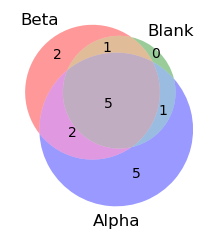

In [28]:
iord = 'd'
# Define the subset sizes
# Order: (100, 010, 110, 001, 101, 011, 111)
subset_sizes = (i_d_results_all[ses_idx][iord]['only_in_beta'], 
                i_d_results_all[ses_idx][iord]['only_in_blank'], 
                i_d_results_all[ses_idx][iord]['in_beta_and_blank'], 
                i_d_results_all[ses_idx][iord]['only_in_alpha'], 
                i_d_results_all[ses_idx][iord]['in_beta_and_alpha'], 
                i_d_results_all[ses_idx][iord]['in_alpha_and_blank'], 
                i_d_results_all[ses_idx][iord]['in_all_three'])  

# Create a Venn diagram
plt.figure(figsize=(2.5,2.5))
venn3(subsets=subset_sizes, set_labels=('Beta', 'Blank', 'Alpha'))
plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\s11_decreased_venn.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
unclassified = 40-(1+1+1+1+1+1+2+2+5+5)
unclassified

20

all sessions

In [18]:
all_i = np.zeros(8)
all_d = np.zeros(8)

for ses in range(len(s)):
    data_i = i_d_results_all[ses]['i']
    data_d = i_d_results_all[ses]['d']

    all_i[0] += data_i['only_in_alpha']
    all_i[1] += data_i['only_in_beta']
    all_i[2] += data_i['only_in_blank']
    try:
        all_i[3] += data_i['in_beta_and_alpha']
    except:
        all_i[3] += data_i['in_alpha_and_beta']
    all_i[4] += data_i['in_alpha_and_blank']
    all_i[5] += data_i['in_beta_and_blank']
    all_i[6] += data_i['in_all_three']
    all_i[7] += len(PSTH_dic_all[ses][1]['Pi_poi'])

    all_d[0] += data_d['only_in_alpha']
    all_d[1] += data_d['only_in_beta']
    all_d[2] += data_d['only_in_blank']
    try:
        all_d[3] += data_d['in_beta_and_alpha']
    except:
        all_d[3] += data_d['in_alpha_and_beta']
    all_d[4] += data_d['in_alpha_and_blank']
    all_d[5] += data_d['in_beta_and_blank']
    all_d[6] += data_d['in_all_three']
    all_d[7] += len(PSTH_dic_all[ses][1]['Pi_poi'])


In [19]:
data_all_i = {'only_in_alpha': int(all_i[0]),
  'only_in_beta': int(all_i[1]),
  'only_in_blank': int(all_i[2]),
  'in_beta_and_alpha': int(all_i[3]),
  'in_alpha_and_blank': int(all_i[4]),
  'in_beta_and_blank': int(all_i[5]),
  'in_all_three': int(all_i[6])}

data_all_d = {'only_in_alpha': int(all_d[0]),
  'only_in_beta': int(all_d[1]),
  'only_in_blank': int(all_d[2]),
  'in_beta_and_alpha': int(all_d[3]),
  'in_alpha_and_blank': int(all_d[4]),
  'in_beta_and_blank': int(all_d[5]),
  'in_all_three': int(all_d[6])}

n_cells = all_i[-1]-4

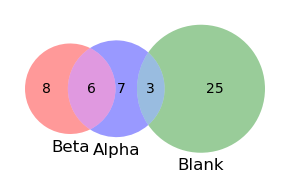

In [27]:

# Define the subset sizes
# Order: (100, 010, 110, 001, 101, 011, 111)
subset_sizes = (data_all_i['only_in_beta'], 
                data_all_i['only_in_blank'], 
                data_all_i['in_beta_and_blank'], 
                data_all_i['only_in_alpha'], 
                data_all_i['in_beta_and_alpha'], 
                data_all_i['in_alpha_and_blank'], 
                data_all_i['in_all_three'])  

# Create a Venn diagram
plt.figure(figsize=(3,2.5))
venn3(subsets=subset_sizes, set_labels=('Beta', 'Blank', 'Alpha'))

plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\all_increased_venn.png', dpi=300, bbox_inches='tight')
plt.show()

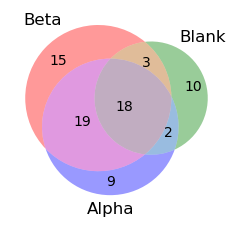

In [23]:
# Define the subset sizes
# Order: (100, 010, 110, 001, 101, 011, 111)
subset_sizes = (data_all_d['only_in_beta'], 
                data_all_d['only_in_blank'], 
                data_all_d['in_beta_and_blank'], 
                data_all_d['only_in_alpha'], 
                data_all_d['in_beta_and_alpha'], 
                data_all_d['in_alpha_and_blank'], 
                data_all_d['in_all_three'])  

# Create a Venn diagram
plt.figure(figsize=(2.5,2.5))
venn3(subsets=subset_sizes, set_labels=('Beta', 'Blank', 'Alpha'))

plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\all_decreased_venn.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
n_cells

199.0

In [32]:
classified_cells = sum(data_all_i.values()) + sum(data_all_d.values())

In [33]:
unclassified_cells = n_cells - classified_cells
unclassified_cells

74.0

In [36]:
74*100/199

37.185929648241206

### Classification on interneurons and pyr

In [361]:
meta = {}
meta[45] = {'mouse':'3C280', 'ks':'Kilosort_2024-04-12_162032', 'del_units':[594], 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[46] = {'mouse':'3C280', 'ks':'Kilosort_2024-04-12_180855', 'del_units':None, 'vis_mice':np.array(['nan', 'alpha', 'beta'])}
meta[11] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-06_154258', 'del_units':[847, 835], 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[13] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-14_120055', 'del_units':None, 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[14] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-14_122629', 'del_units':None, 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[19] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-14_140410', 'del_units':None, 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[20] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-15_110539', 'del_units':[33], 'vis_mice':np.array(['nan', 'beta', 'alpha'])}

In [400]:
Session = 20
mouse = meta[Session]['mouse']
vis_mice = meta[Session]['vis_mice']
vis_mice = list(vis_mice)
vis_mice.append('blank')
vis_mice = vis_mice[1:]

In [401]:
matfile =  f'L:\\everyone\\sharedDATA\\ProcessedDATA\\{mouse}\\{mouse}_S{Session}\\{mouse}_S{Session}.spikes.cellinfo.mat'
pyr_inter = loadmat(matfile)

In [402]:
arr = pyr_inter['spikes']['CellClassifier']
arr

array(array((array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=uint8), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8), array([0.96603774, 0.94814815, 0.91428571, 0.91428571, 0.96603774,
       0.98461538, 0.88275862, 0.81269841, 0.91428571, 1.04489796,
       0.86779661, 1.24878049, 0.91428571, 0.93090909, 0.98461538,
       0.74202899, 0.8       ]), array([0.6 , 0.6 , 0.65, 0.6 , 0.55, 0.5 , 0.55, 0.25, 0.65, 0.7 , 0.25,
       0.5 , 0.65, 0.6 , 0.65, 0.25, 0.25]), array([3.1508117 , 3.61061872, 3.55517881, 3.82618361, 3.04485181,
       2.26070407, 3.6644336 , 4.06106169, 4.05825378, 2.74445021,
       4.16405775, 1.81780219, 4.17569528, 3.44214133, 3.39934252,
       2.27888095, 3.43038811])),
      dtype=[('Piramidal', 'O'), ('InterneuronUnits', 'O'), ('Classed', 'O'), ('SpkW', 'O'), ('TtoPdur', 'O'), ('RatioTtoP', 'O')]),
      dtype=object)

manually copy-pasted from each session

In [406]:
# pyr, inter
s11 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

s45 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]])

s46 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]])

s13 = np.array([[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

s14 = np.array([[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

s19 = np.array([[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]])

s20 = np.array([[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [411]:
pyr_inter_matrix = np.zeros((len(s), 3)) #pyr, inter,not classified
all_ses_data = [s45,s46,s11,s13,s14,s19,s20]

for i,ses in enumerate(all_ses_data):
    pyr_inter_matrix[i,0] = np.sum(ses[0])
    pyr_inter_matrix[i,1] = np.sum(ses[1])
    pyr_inter_matrix[i,2] = len(ses[0])-(np.sum(ses[0])+ np.sum(ses[1]))

pyr_inter_matrix

array([[ 8., 16.,  0.],
       [ 8., 23.,  0.],
       [27., 13.,  0.],
       [30., 11.,  0.],
       [26.,  6.,  0.],
       [12.,  6.,  0.],
       [12.,  5.,  0.]])

In [412]:
total_pyr_inter = np.sum(pyr_inter_matrix, axis=0)
total_pyr_inter

array([123.,  80.,   0.])

In [414]:
s11_pyr_inter = pyr_inter_matrix[2]
s11_pyr_inter

array([27., 13.,  0.])

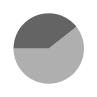

In [421]:
# Data to plot
sizes = [123, 80]
colors = ['#AFAFAF', '#646464']


# Plot
plt.figure(figsize=(1,1))
plt.pie(sizes,  colors=colors, startangle=180)

plt.axis('equal')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\all_pyr_inter.png', dpi=300, bbox_inches='tight')
plt.show()

In [418]:
total_pyr_inter*100/np.sum(total_pyr_inter)

array([60.591133, 39.408867,  0.      ])

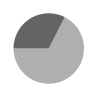

In [420]:
sizes = [27., 13]
colors = ['#AFAFAF', '#646464']


# Plot
plt.figure(figsize=(1,1))
plt.pie(sizes,  colors=colors, startangle=180)

plt.axis('equal')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\s11_pyr_inter.png', dpi=300, bbox_inches='tight')
plt.show()

In [419]:
s11_pyr_inter*100/np.sum(s11_pyr_inter)

array([67.5, 32.5,  0. ])

In [45]:
np.array([7,12,18,24,30])-6

array([ 1,  6, 12, 18, 24])

## Shift

In [16]:
shift_models_loaded = {}

SVM_sbl = []
bayes_sbl = []
SVM_ab = []
bayes_ab = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\S{Session}\\{mouse}_S{Session}_classifiers_results_shift.pkl', 'rb') as f:
        shift_models_dic = pickle.load(f)
        SVM_sbl.append(shift_models_dic['SVM_sbl'])
        bayes_sbl.append(shift_models_dic['bayes_sbl'])
        SVM_ab.append(shift_models_dic['SVM_ab'])
        bayes_ab.append(shift_models_dic['bayes_ab'])

shift_models_loaded['SVM_sbl'] = SVM_sbl
shift_models_loaded['bayes_sbl'] = bayes_sbl
shift_models_loaded['SVM_ab'] = SVM_ab
shift_models_loaded['bayes_ab'] = bayes_ab

In [17]:
len(SVM_sbl), len(SVM_sbl[0]) # 7 sessions; 41 time windows

(7, 41)

here we stored only accuracies cz i didnt do shuffles for window shift analysis

In [108]:
type(SVM_sbl[0])

list

In [18]:
len(np.arange(0,41,1)), len(np.arange(0,41,1)[30:])

(41, 11)

In [19]:
np.arange(0,41,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [20]:
def before_during_after(model_data='SVM_sbl'):

    n_sessions = len(s)

    acc_bda = np.zeros((n_sessions,3))

    for i in range(n_sessions):
        acc_before = np.mean(np.array(shift_models_loaded[model_data][i][:11])) # 11 windows
        acc_during = np.mean(np.array(shift_models_loaded[model_data][i][17:24]))
        acc_after = np.mean(np.array(shift_models_loaded[model_data][i][30:]))

        acc_bda[i,0] = acc_before
        acc_bda[i,1] = acc_during
        acc_bda[i,2] = acc_after

    return acc_bda

In [21]:
acc_bda_svm_sb =before_during_after(model_data='SVM_sbl')
acc_bda_svm_ab = before_during_after(model_data='SVM_ab')

In [22]:
acc_bda_svm_sb.shape

(7, 3)

In [23]:
acc_bda_svm_sb[:,0]

array([0.7030303 , 0.79393939, 0.84393939, 0.95151515, 0.9       ,
       0.71060606, 0.64545455])

In [25]:
for dat in [acc_bda_svm_sb[:,0], acc_bda_svm_sb[:,1],acc_bda_svm_sb[:,2], acc_bda_svm_ab[:,0],acc_bda_svm_ab[:,1],acc_bda_svm_ab[:,2]]:
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(dat, 'norm')
    if p > 0.05:
        print(f'Distr is normal, p = {p:.3f}')
    else:
        print(f"Distr is NOT normal, p = {p:.3f}")

Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000


compare 3 groups and check whether they are different:

- Repeated Measures ANOVA: If your samples are related (e.g., measurements taken from the same subjects at different times).
- Friedman Test: A non-parametric alternative to repeated measures ANOVA.

In [34]:
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

In [37]:
before, during, after = acc_bda_svm_sb[:,0], acc_bda_svm_sb[:,1],acc_bda_svm_sb[:,2]

# Perform the Friedman test
stat, p_value = friedmanchisquare(before, during, after)
print(f'Friedman test p-value: {p_value:.3f}')

# Combine data into a single DataFrame for post hoc test
data = np.array([before, during, after]).T
df = pd.DataFrame(data, columns=['before', 'during', 'after'])

# Perform the Nemenyi post hoc test
nemenyi_results = sp.posthoc_nemenyi_friedman(df)

print(nemenyi_results)
print()
print(nemenyi_results<0.05)

Friedman test p-value: 0.163
          before    during    after
before  1.000000  0.147296  0.60841
during  0.147296  1.000000  0.60841
after   0.608410  0.608410  1.00000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


In [47]:
p_sb = 0.163
p_sb_bd = 0.147
p_sb_da =  0.608

In [38]:
before, during, after = acc_bda_svm_ab[:,0],acc_bda_svm_ab[:,1],acc_bda_svm_ab[:,2]

# Perform the Friedman test
stat, p_value = friedmanchisquare(before, during, after)
print(f'Friedman test p-value: {p_value:.3f}')

# Combine data into a single DataFrame for post hoc test
data = np.array([before, during, after]).T
df = pd.DataFrame(data, columns=['before', 'during', 'after'])

# Perform the Nemenyi post hoc test
nemenyi_results = sp.posthoc_nemenyi_friedman(df)

print(nemenyi_results)
print()
print(nemenyi_results<0.05)

Friedman test p-value: 0.180
          before    during     after
before  1.000000  0.244362  0.900000
during  0.244362  1.000000  0.244362
after   0.900000  0.244362  1.000000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


In [48]:
p_ab = 0.180
p_ab_bd = 0.244
p_ab_da =  0.244

if we use anova

In [39]:
# pip install pingouin

In [ ]:
import pandas as pd
import pingouin as pg

In [32]:
# Repeated Measures ANOVA

# Assuming your data is stored in these arrays
before, during, after = acc_bda_svm_sb[:,0], acc_bda_svm_sb[:,1],acc_bda_svm_sb[:,2]

# Create a DataFrame in long format
data = {
    'subject': np.tile(np.arange(1, len(before) + 1), 3),
    'time': np.repeat(['before', 'during', 'after'], len(before)),
    'value': np.concatenate([before, during, after])
}

df = pd.DataFrame(data)

# Perform 
rm_anova = pg.rm_anova(dv='value', within='time', subject='subject', data=df)
p_value = rm_anova['p-unc'][0]
print(f'p-value: {p_value:.3f}')

  Source  ddof1  ddof2         F     p-unc       ng2       eps
0   time      2     12  3.321818  0.071106  0.086467  0.872104
p-value: 0.071


In [40]:
before, during, after = acc_bda_svm_sb[:,0], acc_bda_svm_sb[:,1],acc_bda_svm_sb[:,2]

data = {
    'subject': np.tile(np.arange(1, len(before) + 1), 3),
    'time': np.repeat(['before', 'during', 'after'], len(before)),
    'value': np.concatenate([before, during, after])
}

df = pd.DataFrame(data)

# Perform Repeated Measures ANOVA
rm_anova = pg.rm_anova(dv='value', within='time', subject='subject', data=df)
p_value = rm_anova['p-unc'][0]
print(f'p-value: {p_value:.3f}')

# Perform post hoc pairwise comparisons
posthoc = pg.pairwise_ttests(dv='value', within='time', subject='subject', data=df, padjust='bonferroni')
print(posthoc)

p-value: 0.071
  Contrast       A       B  Paired  Parametric         T  dof alternative  \
0     time   after  before    True        True  1.633317  6.0   two-sided   
1     time   after  during    True        True -1.181184  6.0   two-sided   
2     time  before  during    True        True -2.370779  6.0   two-sided   

      p-unc    p-corr    p-adjust   BF10    hedges  
0  0.153521  0.460564  bonferroni  0.891  0.291021  
1  0.282223  0.846670  bonferroni  0.599 -0.346691  
2  0.055462  0.166385  bonferroni  1.839 -0.705740  


c:\Users\ebukina\AppData\Local\anaconda3\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [41]:
before, during, after = acc_bda_svm_ab[:,0], acc_bda_svm_ab[:,1],acc_bda_svm_ab[:,2]

data = {
    'subject': np.tile(np.arange(1, len(before) + 1), 3),
    'time': np.repeat(['before', 'during', 'after'], len(before)),
    'value': np.concatenate([before, during, after])
}

df = pd.DataFrame(data)

# Perform Repeated Measures ANOVA
rm_anova = pg.rm_anova(dv='value', within='time', subject='subject', data=df)
p_value = rm_anova['p-unc'][0]
print(f'p-value: {p_value:.3f}')

# Perform post hoc pairwise comparisons
posthoc = pg.pairwise_ttests(dv='value', within='time', subject='subject', data=df, padjust='bonferroni')
print(posthoc)

p-value: 0.220
  Contrast       A       B  Paired  Parametric         T  dof alternative  \
0     time   after  before    True        True  0.696658  6.0   two-sided   
1     time   after  during    True        True -1.824790  6.0   two-sided   
2     time  before  during    True        True -1.442828  6.0   two-sided   

      p-unc    p-corr    p-adjust   BF10    hedges  
0  0.512089  1.000000  bonferroni   0.43  0.152191  
1  0.117836  0.353507  bonferroni  1.069 -0.271442  
2  0.199169  0.597508  bonferroni  0.748 -0.427926  


c:\Users\ebukina\AppData\Local\anaconda3\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


but we will stick to non-parametric!

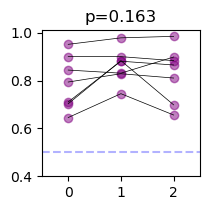

In [52]:
matrix = acc_bda_svm_sb # (7,3)
color = '#800080'
title = 'svm_sb'

plt.figure(figsize=(2.2, 2.2))
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.3)
for ses in range(len(matrix)):
    # Plot the black lines
    plt.plot(matrix[ses, :], color='black', linewidth = 0.5)
    # Plot the colored markers
    plt.scatter(range(matrix.shape[1]), matrix[ses, :], color=color, alpha=0.5)
plt.xlim(-0.5,2.5)
plt.ylim(0.4,1.01)
plt.title(f'p={p_sb:.3f}')
plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{title}.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
p_ab = 0.180
p_ab_bd = 0.244
p_ab_da =  0.244

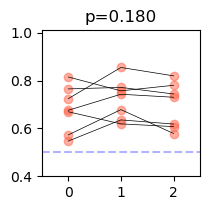

In [51]:
matrix = acc_bda_svm_ab # (7,3)
color = '#FF6347'
title = 'svm_ab'

plt.figure(figsize=(2.2, 2.2))
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.3)
for ses in range(len(matrix)):
    # Plot the black lines
    plt.plot(matrix[ses, :], color='black', linewidth = 0.5)
    # Plot the colored markers
    plt.scatter(range(matrix.shape[1]), matrix[ses, :], color=color, alpha=0.5)
plt.xlim(-0.5,2.5)
plt.ylim(0.4,1.01)
plt.title(f'p={p_ab:.3f}')
plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{title}.png', dpi=300, bbox_inches='tight')
plt.show()

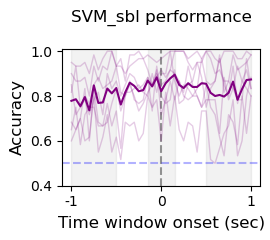

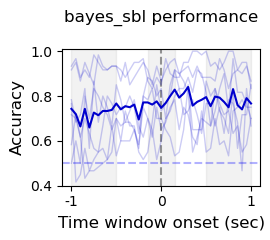

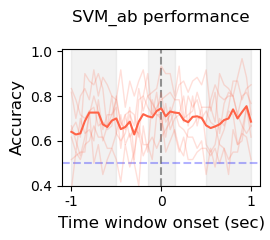

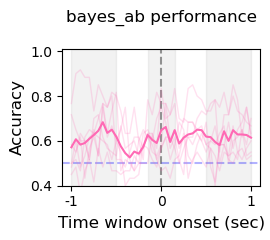

In [53]:
model_data_list = ['SVM_sbl', 'bayes_sbl', 'SVM_ab', 'bayes_ab']
colors = ['#800080', '#0000CD', '#FF6347', '#FF69B4']

for mew in range(len(model_data_list)):


    model_data=model_data_list[mew]
    color = colors[mew]

    plt.figure(figsize=(2.8,2.5)) 
    plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)
    plt.axhline(0.5, color='blue', linestyle='--', alpha=0.3)
    for i in range(len(s)):
        plt.plot(shift_models_loaded[model_data][i], color=color, alpha=0.2, linewidth=1)
    mean_accuracy = np.mean(np.array(shift_models_loaded[model_data]), axis=0)
    plt.plot(mean_accuracy, color=color, alpha=1)

    plt.axvspan(17,23, color='black', alpha=0.05)
    plt.axvspan(0,10, color='black', alpha=0.05)
    plt.axvspan(30,40, color='black', alpha=0.05)

    plt.xlabel('Time window onset (sec)',  fontsize=12)
    plt.ylabel('Accuracy',  fontsize=12)
    plt.title(f"{model_data} performance\n")
    plt.xticks([0,20,40], labels=[-1,0,1])

    # plt.legend()
    plt.ylim(0.4,1.01)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\shift_acc_{model_data}.png', dpi=300, bbox_inches='tight')
    plt.show()


shuffle control

In [243]:
SVM_sbl_sh = []

for ses in range(len(s)):
    ses_acc = np.array(SVM_sbl[ses])
    ids = list(range(len(ses_acc)))
    random.shuffle(ids)
    ses_acc = ses_acc[ids]
    SVM_sbl_sh.append(ses_acc)

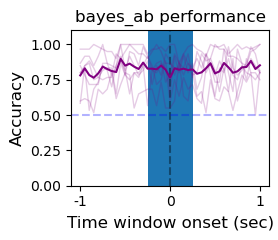

In [245]:
plt.figure(figsize=(2.8,2.5)) 
plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.3)
for i in range(len(s)):
    plt.plot(SVM_sbl_sh[i], color='#800080', alpha=0.2, linewidth=1)
mean_accuracy = np.mean(np.array(SVM_sbl_sh), axis=0)
plt.plot(mean_accuracy, color='#800080', alpha=1)
plt.xlabel('Time window onset (sec)',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.title(f"{model_data} performance")
plt.axvspan(15,25)
plt.xticks([0,20,40], labels=[-1,0,1])

# plt.legend()
plt.ylim(0,1.1)
plt.tight_layout()
# plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\shift_acc_{model_data}.png', dpi=300, bbox_inches='tight')
plt.show()

In [130]:
def stat_sh(model, color,j):
    # Example list of 7 vectors (each vector representing accuracies over time for a session)
    sessions = []
    for ses in range(len(s)):
        sessions.append(np.array(model[ses]))


    # Define the time indices (assuming they are the same for all sessions)
    time_indices = np.array(range(-20, 21))  # Example time indices from -10 to 10

    # Define time windows
    # baseline_window = (-20, -10)  # Example time window before time zero
    baseline_window = (10, 20)  # Example time window before time zero
    post_zero_window = (-5, 5)   # Example time window around time zero

    # Calculate observed mean accuracies in the defined windows
    baseline_indices = (time_indices >= baseline_window[0]) & (time_indices <= baseline_window[1])
    post_zero_indices = (time_indices >= post_zero_window[0]) & (time_indices <= post_zero_window[1])

    baseline_accuracies = [np.mean(session[baseline_indices]) for session in sessions]
    post_zero_accuracies = [np.mean(session[post_zero_indices]) for session in sessions]

    baseline_mean_accuracy = np.mean(baseline_accuracies)
    post_zero_mean_accuracy = np.mean(post_zero_accuracies)

    print(baseline_mean_accuracy, post_zero_mean_accuracy)

    # Calculate observed difference
    observed_diff = post_zero_mean_accuracy - baseline_mean_accuracy

    print(observed_diff)

    # Number of permutations
    n_permutations = 1000
    shuffled_diffs = []

    for _ in range(n_permutations):
        shuffled_sessions = [np.random.permutation(session) for session in sessions]
        
        shuffled_baseline_accuracies = [np.mean(session[baseline_indices]) for session in shuffled_sessions]
        shuffled_post_zero_accuracies = [np.mean(session[post_zero_indices]) for session in shuffled_sessions]
        
        shuffled_baseline_mean = np.mean(shuffled_baseline_accuracies)
        shuffled_post_zero_mean = np.mean(shuffled_post_zero_accuracies)
        
        shuffled_diff = shuffled_post_zero_mean - shuffled_baseline_mean
        shuffled_diffs.append(shuffled_diff)

    shuffled_diffs = np.array(shuffled_diffs)

    # Calculate p-value
    p_value = np.sum(shuffled_diffs >= observed_diff) / n_permutations
    print(p_value)

    # Plot the distribution of shuffled differences
    plt.figure(figsize=(3,2.3)) 
    plt.hist(shuffled_diffs, bins=30, alpha=0.5, color=color)
    plt.axvline(observed_diff, color='green')
    plt.xlabel('Difference in Mean Accuracy', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xlim(-0.1,0.1)
    plt.ylim(0,110)
    plt.tight_layout()
    plt.title(f'diff = {observed_diff:.3f}, p_val = {p_value:.3f}')
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{j}_permutation_accuracy_after.png', dpi=300, bbox_inches='tight')
    plt.show()

0.8281385281385282 0.8528138528138528
0.024675324675324628
0.029


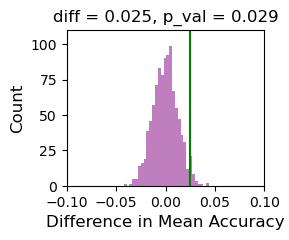

0.7774891774891773 0.7751082251082251
-0.0023809523809522615
0.542


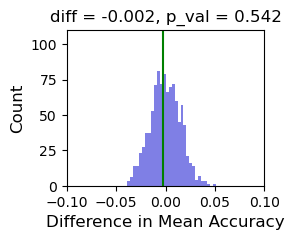

0.696969696969697 0.7164502164502163
0.01948051948051932
0.074


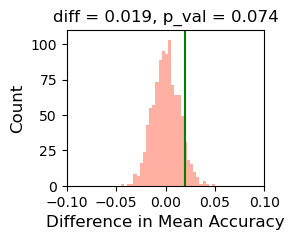

0.618181818181818 0.6084415584415586
-0.009740259740259494
0.757


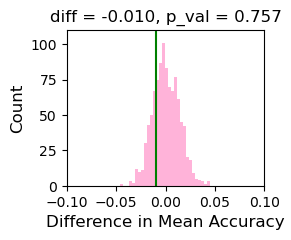

In [131]:
for j, model in enumerate([SVM_sbl, bayes_sbl, SVM_ab, bayes_ab]):
    stat_sh(model, color=colors[j], j=j)

### Distances for window shift

In [54]:
MD_matrices = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\S{Session}\\{mouse}_S{Session}_MD_matrix_all.pkl', 'rb') as f:
        MD_matrix = pickle.load(f)
        MD_matrices.append(MD_matrix)

In [55]:
ED_matrices = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\S{Session}\\{mouse}_S{Session}_ED_matrix_all.pkl', 'rb') as f:
        ED_matrix = pickle.load(f)
        ED_matrices.append(ED_matrix)

In [57]:
MD_tensor = np.stack(MD_matrices)
ED_tensor = np.stack(ED_matrices)

In [58]:
MD_tensor.shape, ED_tensor.shape

((7, 41, 3, 3), (7, 41, 3, 3))

In [59]:
np.mean(MD_tensor[1,:11,:,:], axis=0).shape

(3, 3)

In [69]:
def MD_plot(D_matrices, a,b, tit, color='blue'):
    plt.figure(figsize=(2.9,2.5)) 
    plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)

    list_for_mean = []
    for i in range(len(D_matrices)):
        matrix = D_matrices[i]
        list_for_mean.append(matrix[:,a,b])
        plt.plot(matrix[:,a,b], color=color, alpha=0.2, linewidth=1)
    mean_ED = np.mean(np.array(list_for_mean), axis=0)
    plt.plot(mean_ED, color=color, alpha=1)
    plt.axvspan(17,23, color='black', alpha=0.05)
    plt.axvspan(0,10, color='black', alpha=0.05)
    plt.axvspan(30,40, color='black', alpha=0.05)


    plt.xlabel('Time window onset (sec)',  fontsize=12)
    plt.ylabel('Mahalanobis\ndistance',  fontsize=12)
    plt.title('\n'+tit)
    plt.xticks([0,20,40], labels=[-1,0,1])

    # plt.legend()
    plt.ylim(-0.1,2.5)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{tit}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [66]:
def ED_plot(D_matrices, a,b, tit, color='blue'):
    plt.figure(figsize=(2.8,2.5)) 
    plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)

    list_for_mean = []
    for i in range(len(D_matrices)):
        matrix = D_matrices[i]
        list_for_mean.append(matrix[:,a,b])
        plt.plot(matrix[:,a,b], color=color, alpha=0.2, linewidth=1)
    mean_ED = np.mean(np.array(list_for_mean), axis=0)
    plt.plot(mean_ED, color=color, alpha=1)
    plt.axvspan(17,23, color='black', alpha=0.05)
    plt.axvspan(0,10, color='black', alpha=0.05)
    plt.axvspan(30,40, color='black', alpha=0.05)


    plt.xlabel('Time window onset (sec)',  fontsize=12)
    plt.ylabel('Euclidean\ndistance',  fontsize=12)
    plt.title('\n'+tit)
    plt.xticks([0,20,40], labels=[-1,0,1])
    plt.yticks([0,1], labels=[0,1])

    # plt.legend()
    plt.ylim(-0.1,1.1)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{tit}.png', dpi=300, bbox_inches='tight')
    plt.show()

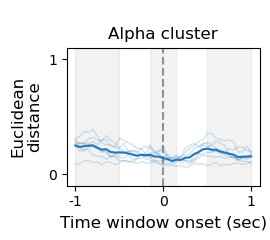

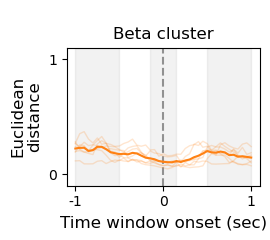

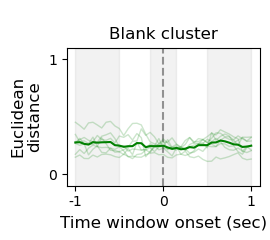

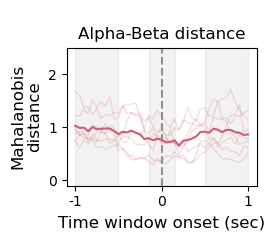

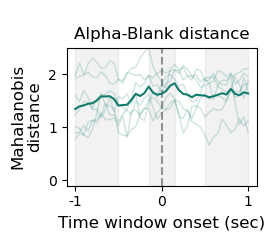

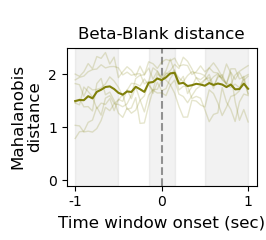

In [70]:
ED_plot(ED_matrices,0,0,'Alpha cluster','#1F77B4')
ED_plot(ED_matrices,1,1,'Beta cluster','#FF8113')
ED_plot(ED_matrices,2,2, 'Blank cluster','green')
MD_plot(MD_matrices,0,1, 'Alpha-Beta distance', '#d15c73')
MD_plot(MD_matrices,0,2, 'Alpha-Blank distance','#137b6c')
MD_plot(MD_matrices,1,2, 'Beta-Blank distance', '#80800a')

In [72]:
def before_during_after_D(MD_tensor):

    n_sessions = MD_tensor.shape[0]

    D_bda = np.zeros((n_sessions,3,3,3)) # ses, bef/dur/after, 3*3 dist matrix

    for i in range(n_sessions):
        D_before = np.mean(MD_tensor[i,:11,:,:], axis=0) # 11 windows
        D_during = np.mean(MD_tensor[i,17:24,:,:], axis=0)
        D_after = np.mean(MD_tensor[i,30:,:,:], axis=0)

        D_bda[i,0,:,:] = D_before
        D_bda[i,1,:,:] = D_during
        D_bda[i,2,:,:] = D_after

    return D_bda

In [73]:
MD_bda = before_during_after_D(MD_tensor) # ses, b/dur/af, 3*3 matrix
ED_bda = before_during_after_D(ED_tensor)
MD_bda.shape, ED_bda.shape

((7, 3, 3, 3), (7, 3, 3, 3))

In [74]:
ED_bda[:,:,0,0].shape

(7, 3)

In [76]:
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

In [114]:
def bef_dur_af_analysis(D_bda, x,y, ylim,color,title):

    # normalty check
    for dat in [D_bda[:,0,x,y], D_bda[:,1,x,y],D_bda[:,2,x,y]]:
        # Kolmogorov-Smirnov Test
        stat, p = stats.kstest(dat, 'norm')
        if p > 0.05:
            print(f'Distr is normal, p = {p:.3f}')
        else:
            print(f"Distr is NOT normal, p = {p:.3f}")

    # stats
    before, during, after = D_bda[:,0,x,y], D_bda[:,1,x,y],D_bda[:,2,x,y]

    # Perform the Friedman test
    stat, p_value = friedmanchisquare(before, during, after)
    print(f'Friedman test p-value: {p_value:.3f}')

    # Combine data into a single DataFrame for post hoc test
    data = np.array([before, during, after]).T
    df = pd.DataFrame(data, columns=['before', 'during', 'after'])

    # Perform the Nemenyi post hoc test
    nemenyi_results = sp.posthoc_nemenyi_friedman(df)

    print(nemenyi_results)
    print()
    print(nemenyi_results<0.05)

    # plot
    matrix = D_bda[:,:,x,y] # (7,3)

    plt.figure(figsize=(2.2, 2.2))
    for ses in range(len(matrix)):
        # Plot the black lines
        plt.plot(matrix[ses, :], color='black', linewidth = 0.5)
        # Plot the colored markers
        plt.scatter(range(matrix.shape[1]), matrix[ses, :], color=color, alpha=0.5)
    plt.xlim(-0.5,2.5)
    plt.ylim(ylim)
    # plt.yticks([0,1,2], [0,1,2])
    plt.title(f'p={p_value:.3f}')
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{title}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [111]:
colors = ['#1F77B4', '#FF8113','green', '#137b6c', '#80800a', '#d15c73']

Distr is NOT normal, p = 0.020
Distr is NOT normal, p = 0.021
Distr is NOT normal, p = 0.021
Friedman test p-value: 0.004
          before    during     after
before  1.000000  0.003837  0.042703
during  0.003837  1.000000  0.684851
after   0.042703  0.684851  1.000000

        before  during  after
before   False    True   True
during    True   False  False
after     True   False  False


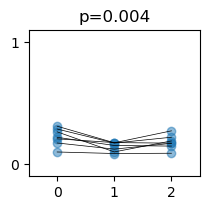

In [85]:
D_bda = ED_bda
color = '#1F77B4'
title = 'Alpha cluster dots'
x,y = 0,0
ylim = [-0.1,1.1]

bef_dur_af_analysis(D_bda, x,y, ylim,color,title)

Distr is NOT normal, p = 0.019
Distr is NOT normal, p = 0.025
Distr is NOT normal, p = 0.018
Friedman test p-value: 0.002
          before    during     after
before  1.000000  0.001488  0.376245
during  0.001488  1.000000  0.082380
after   0.376245  0.082380  1.000000

        before  during  after
before   False    True  False
during    True   False  False
after    False   False  False


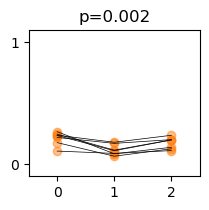

In [87]:
D_bda = ED_bda
color = colors[1]
title = 'Beta cluster dots'
x,y = 1,1
ylim = [-0.1,1.1]

bef_dur_af_analysis(D_bda, x,y, ylim,color,title)

Distr is NOT normal, p = 0.013
Distr is NOT normal, p = 0.012
Distr is NOT normal, p = 0.014
Friedman test p-value: 0.276
          before    during     after
before  1.000000  0.684851  0.684851
during  0.684851  1.000000  0.244362
after   0.684851  0.244362  1.000000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


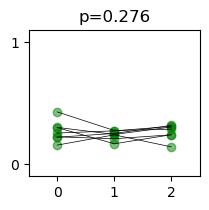

In [88]:
D_bda = ED_bda
color = colors[2]
title = 'Blank cluster dots'
x,y = 2,2
ylim = [-0.1,1.1]

bef_dur_af_analysis(D_bda, x,y, ylim,color,title)

Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Friedman test p-value: 0.368
          before    during     after
before  1.000000  0.376245  0.900000
during  0.376245  1.000000  0.531965
after   0.900000  0.531965  1.000000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


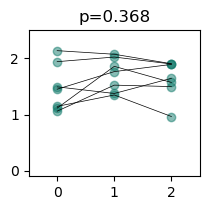

In [93]:
D_bda = MD_bda
color = colors[3]
title = 'Alpha-Blank dots'
x,y = 0,2
ylim = [-0.1,2.5]

bef_dur_af_analysis(D_bda, x,y, ylim,color,title)

Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Friedman test p-value: 0.368
          before    during     after
before  1.000000  0.376245  0.900000
during  0.376245  1.000000  0.531965
after   0.900000  0.531965  1.000000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


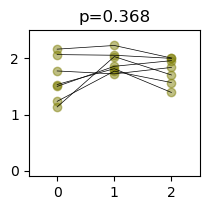

In [94]:
D_bda = MD_bda
color = colors[4]
title = 'Beta-Blank dots'
x,y = 1,2
ylim = [-0.1,2.5]

bef_dur_af_analysis(D_bda, x,y, ylim,color,title)

Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.002
Distr is NOT normal, p = 0.001
Friedman test p-value: 0.180
          before    during     after
before  1.000000  0.244362  0.900000
during  0.244362  1.000000  0.244362
after   0.900000  0.244362  1.000000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


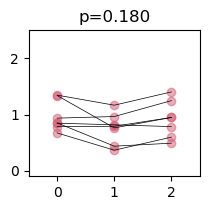

In [95]:
D_bda = MD_bda
color = colors[5]
title = 'Alpha-Beta dots'
x,y = 0,1
ylim = [-0.1,2.5]

bef_dur_af_analysis(D_bda, x,y, ylim,color,title)

## Cosine similarity

In [96]:
abbl = [[2,1],[1,2],[2,1],[2,1],[2,1],[2,1],[2,1],[2,1]]

In [97]:
shift_lists = []
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\S{Session}\\{mouse}_S{Session}_shift_tensor.pkl', 'rb') as f:
        shift_tensor = pickle.load(f)
        shift_lists.append(shift_tensor)

In [98]:
shift_lists[0].shape

(41, 90, 23)

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
sessions_cos_sim = []
for i in range(len(s)):
    cos_sim2 = []
    for w in range(shift_lists[i].shape[0]):
        m = shift_lists[i][w,:,:]
        k = int(len(m)/3)
        a = np.mean(m[:k,:], axis=0)
        b = np.mean(m[k:k+k,:], axis=0)
        c = np.mean(m[k+k:,:], axis=0)

        abc = np.array((a,b,c))
        cos_sim2.append(cosine_similarity(abc))
        
    cos_sim2_tensor = np.stack(cos_sim2, axis=0) 
    sessions_cos_sim.append(cos_sim2_tensor)


In [103]:
sessions_cos_sim[0].shape

(41, 3, 3)

In [104]:
sessions_cos_sim_tensor = np.stack(sessions_cos_sim)
sessions_cos_sim_tensor.shape

(7, 41, 3, 3)

In [335]:
np.mean(sessions_cos_sim_tensor[:,:,0,1], axis=0).shape

(41,)

In [112]:
data = [[0,2], [1,2], [0,1]]
colors = ['#137b6c', '#80800a', '#d15c73']
titles = ['Alpha vs Blank', 'Beta vs Blank', 'Alpha vs Beta']

In [106]:
for j in range(3):    
    a = data[j][0]
    b = data[j][1]
    print(a,b, colors[j])

0 2 #137b6c
1 2 #80800a
0 1 #d15c73


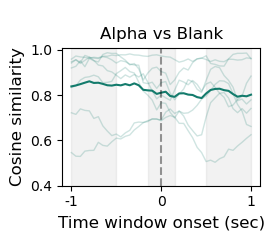

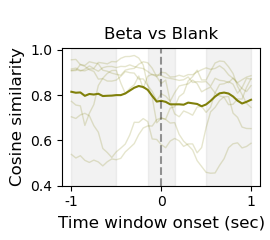

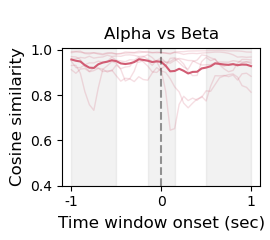

In [108]:
for j in range(3):    
    plt.figure(figsize=(2.8,2.5)) 

    a = data[j][0]
    b = data[j][1]
    for i in range(len(s)):
        cos_sim2_tensor = sessions_cos_sim[i]
        plt.plot(cos_sim2_tensor[:,a,b], color=colors[j], alpha=0.2, linewidth=1)
    
    mean_cos = np.mean(sessions_cos_sim_tensor[:,:,a,b], axis=0)
    plt.plot(mean_cos, color=colors[j], alpha=1)
    plt.axvspan(17,23, color='black', alpha=0.05)
    plt.axvspan(0,10, color='black', alpha=0.05)
    plt.axvspan(30,40, color='black', alpha=0.05)
    plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)
    plt.xlabel('Time window onset (sec)',  fontsize=12)
    plt.ylabel('Cosine similarity',  fontsize=12)
    plt.title('\n'+titles[j])
    plt.xticks([0,20,40], labels=[-1,0,1])
    plt.ylim(0.4,1.01)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\cosine_similarity_{titles[j]}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [109]:
cossim_bda = before_during_after_D(sessions_cos_sim_tensor)
cossim_bda.shape

(7, 3, 3, 3)

In [110]:
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Friedman test p-value: 0.565
          before    during     after
before  1.000000  0.531965  0.837739
during  0.531965  1.000000  0.837739
after   0.837739  0.837739  1.000000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


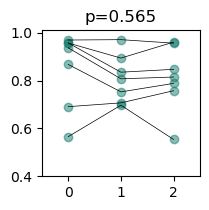

In [115]:
color = colors[0]
title = titles[0]
x,y = 0,2
ylim = [0.4,1.01]

bef_dur_af_analysis(cossim_bda, x,y, ylim,color,title)

Distr is NOT normal, p = 0.001
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.001
Friedman test p-value: 0.651
          before    during     after
before  1.000000  0.684851  0.684851
during  0.684851  1.000000  0.900000
after   0.684851  0.900000  1.000000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


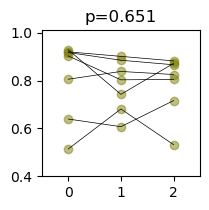

In [116]:
color = colors[1]
title = titles[1]
x,y = 1,2
ylim = [0.4,1.01]

bef_dur_af_analysis(cossim_bda, x,y, ylim,color,title)

Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Distr is NOT normal, p = 0.000
Friedman test p-value: 0.565
          before    during     after
before  1.000000  0.837739  0.531965
during  0.837739  1.000000  0.837739
after   0.531965  0.837739  1.000000

        before  during  after
before   False   False  False
during   False   False  False
after    False   False  False


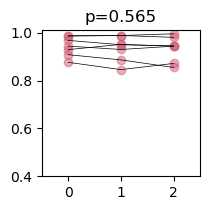

In [117]:
color = colors[2]
title = titles[2]
x,y = 0,1
ylim = [0.4,1.01]

bef_dur_af_analysis(cossim_bda, x,y, ylim,color,title)

## Evening test

In [6]:
s = [38,43,45,46,
     11,14,19,20]
m = ['3C280','3C280','3C280','3C280',
     '3C290','3C290','3C290','3C290']

In [7]:
acc_svm = []
pvals = []

acc_svm_m = []
pvals_m = []

acc_svm_me = []
pvals_me = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\S{Session}\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)
        acc_svm.append(classifiers_results['accuracy_svm'])
        pvals.append(classifiers_results['p_value_ab'])
        acc_svm_m.append(classifiers_results['acc_svm_m'])
        pvals_m.append(classifiers_results['p_value_m'])
        acc_svm_me.append(classifiers_results['acc_svm_me'])
        pvals_me.append(classifiers_results['p_value_me'])

In [8]:
acc_svm = np.array(acc_svm)
pvals = np.array(pvals)
acc_svm_m = np.array(acc_svm_m)
pvals_m = np.array(pvals_m)
acc_svm_me = np.array(acc_svm_me)
pvals_me = np.array(pvals_me)

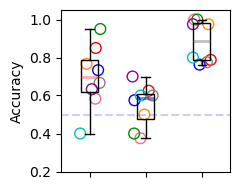

In [9]:
data = [acc_svm_m, acc_svm, acc_svm_me]
colors = ['white', 'white','white']#'#FF6347'
median_colors = ['#FF6347',  '#0000CD','gray']

# Create the boxplot with custom colors
plt.figure(figsize=(2.5,2))
box = plt.boxplot(data, patch_artist=True, showfliers=False)

plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)

# Apply custom colors to each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor('none')
    patch.set_alpha(1) 
    patch.set_edgecolor('black') 

# Change the color of the median lines
for median, median_color  in zip(box['medians'],median_colors):
    median.set_color(median_color)
    median.set_alpha(0.5)
    median.set_linewidth(2)    # Optionally adjust the line width

# Define marker types
m_colors = ['red','#FF6599', '#FF8E00', 'blue', '#008E00', '#00C0C0', 'gray', '#8E008E']

# Overlay the data points directly on the x-axis with different marker types
for i, d in enumerate(data, start=1):
    for idx, y in enumerate(d):
        jittered_x = i + np.random.uniform(-0.25, 0.25)
        plt.scatter(jittered_x, y, s=60, alpha=1, facecolor='none',edgecolor=m_colors[idx % len(m_colors)], linewidth=1)

plt.xticks([1, 2, 3], ['', '', ''])
plt.ylabel('Accuracy')
plt.ylim(0.2, 1.05)
plt.tight_layout()
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\svm_acc_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
models = [acc_svm_m, acc_svm, acc_svm_me]
for i,dat in enumerate(models):
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(dat, 'norm')
    if p > 0.05:
        print(f"Distr is normal, p = {p:.3f}")
    else:
        print(f"Dist is NOT normal, p = {p:.3f}")

Dist is NOT normal, p = 0.001
Dist is NOT normal, p = 0.001
Dist is NOT normal, p = 0.000


In [11]:
from scipy.stats import kruskal

In [12]:
# Perform the Kruskal-Wallis H test
stat, p = kruskal(acc_svm_m, acc_svm, acc_svm_me)

print(f'p-value: {p:.3f}')

# Interpret the result
alpha = 0.05
if p < alpha:
    print('There is a significant difference between the groups')
else:
    print('There is NO significant difference')

p-value: 0.001
There is a significant difference between the groups


In [13]:
import scikit_posthocs as sp
import pandas as pd

In [14]:
# Combine the data into a single DataFrame for post-hoc test
data = np.concatenate([acc_svm_m, acc_svm, acc_svm_me])
groups = ['acc_svm_m']*len(acc_svm_m) + ['acc_svm']*len(acc_svm) + ['acc_svm_me']*len(acc_svm_me)
df = pd.DataFrame({'Value': data, 'Group': groups})

# Perform Dunn's test
posthoc = sp.posthoc_dunn(df, val_col='Value', group_col='Group', p_adjust='bonferroni')

print(posthoc)
print(posthoc<0.05)

             acc_svm  acc_svm_m  acc_svm_me
acc_svm     1.000000   0.289066    0.000530
acc_svm_m   0.289066   1.000000    0.110576
acc_svm_me  0.000530   0.110576    1.000000
            acc_svm  acc_svm_m  acc_svm_me
acc_svm       False      False        True
acc_svm_m     False      False       False
acc_svm_me     True      False       False


In [15]:
evening_p = np.sum(pvals<0.05)
morning_p = np.sum(pvals_m<0.05)
me_p = np.sum(pvals_me<0.05)

In [ ]:
['#FF6347',  '#0000CD','gray']

In [73]:
evening_p

2

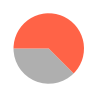

In [76]:
sizes = [8-morning_p, morning_p]
colors = ['#AFAFAF', '#FF6347']


# Plot
plt.figure(figsize=(1,1))
plt.pie(sizes,  colors=colors, startangle=180)

plt.axis('equal')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\morning_pie.png', dpi=300, bbox_inches='tight')
plt.show()

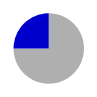

In [77]:
sizes = [8-evening_p, evening_p]
colors = ['#AFAFAF', '#0000CD']


# Plot
plt.figure(figsize=(1,1))
plt.pie(sizes,  colors=colors, startangle=180)

plt.axis('equal')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\evening_pie.png', dpi=300, bbox_inches='tight')
plt.show()

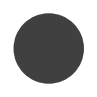

In [16]:
sizes = [8-me_p, me_p]
colors = ['#AFAFAF', '#404040']


# Plot
plt.figure(figsize=(1,1))
plt.pie(sizes,  colors=colors, startangle=180)

plt.axis('equal')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\me_pie.png', dpi=300, bbox_inches='tight')
plt.show()

In [87]:
MD_matrices = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\S{Session}\\{mouse}_S{Session}_D_matrix.pkl', 'rb') as f:
        MD_matrix = pickle.load(f)
        MD_matrices.append(MD_matrix)

In [80]:
MD_npoke_all_sessions = np.zeros((len(MD_matrices),4,4))
for ses in range(len(MD_matrices)):
    MD_npoke_all_sessions[ses,:,:] = MD_matrices[ses]

In [81]:
MD_npoke_mean = np.mean(MD_npoke_all_sessions, axis=0)

In [82]:
def plot_distance_matrix(D_matrix, D_type = "MD", rotate=False):
    plt.figure(figsize=(4, 2.5))

    labels = ['Alpha1', 'Beta1', 'Alpha2', 'Beta2']

    if D_type=='MD':
        cbar_label = 'Mahalanobis distance'
    else:
        cbar_label = 'Euclidean distance'

    if rotate:
        # Create the heatmap
        heatmap = sns.heatmap(D_matrix, annot=D_matrix, cmap='binary', cbar_kws={'label': cbar_label}, linewidths=1, linecolor='white', square=True, vmin=0, vmax=math.sqrt(8))

        # # Customize the heatmap
        heatmap.set_xticklabels(labels, rotation=0)
        heatmap.set_yticklabels(labels, rotation=90)

        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(rotation=90)

    else:
        # Create the heatmap
        sns.heatmap(D_matrix, annot=D_matrix, cmap='binary', cbar_kws={'label': cbar_label}, linewidths=1, linecolor='white', square=True, vmin=0, vmax=math.sqrt(8))

        # # Customize the heatmap
        plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=0)
        plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=90)

    plt.title('Distance in PC space\n')
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\MD_matrix_all.png', dpi=300, bbox_inches='tight')
    plt.show()

In [83]:
import seaborn as sns
import math

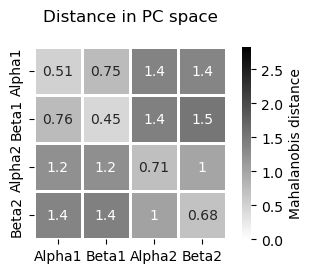

In [84]:
plot_distance_matrix(MD_npoke_mean)

sparsity comparison

In [88]:
ED_matrices = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\\S{Session}\\{mouse}_S{Session}_ED_matrix.pkl', 'rb') as f:
        ED_matrix = pickle.load(f)
        ED_matrices.append(ED_matrix)

In [89]:
ED_npoke_all_sessions = np.zeros((len(ED_matrices),4,4))
for ses in range(len(ED_matrices)):
    ED_npoke_all_sessions[ses,:,:] = ED_matrices[ses]

In [90]:
# sparsity comparison
ED_npoke_all_sessions.shape


(8, 4, 4)

In [139]:
sp_a1 = ED_npoke_all_sessions[:,0,0]
sp_b1 = ED_npoke_all_sessions[:,1,1]
sp_a2 = ED_npoke_all_sessions[:,2,2]
sp_b2 = ED_npoke_all_sessions[:,3,3]

In [140]:
sp1 = np.concatenate((sp_a1,sp_b1))
sp2 = np.concatenate((sp_a2,sp_b2))

In [97]:
for dat in [sp1, sp2]:
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(dat, 'norm')
    if p > 0.05:
        print(f"Distr is normal, p = {p:.3f}")
    else:
        print(f"Dist is NOT normal, p = {p:.3f}")

Dist is NOT normal, p = 0.000
Dist is NOT normal, p = 0.000


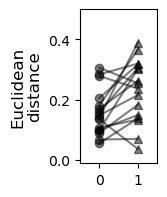

In [112]:
plt.figure(figsize=(1,2))

# Plot lines with dots and triangles
for i in range(len(sp1)):
    bef_af = np.array([sp1[i], sp2[i]])
    plt.plot([0], [bef_af[0]], marker='o', color='k', alpha=0.5)  # Dots for the first column
    plt.plot([1], [bef_af[1]], marker='^', color='k', alpha=0.5)  # Triangles for the second column
    plt.plot([0, 1], bef_af, color='k', alpha=0.5)  # Line connecting the points

plt.xlim(-0.5, 1.5)
plt.ylim(-0.01, 0.5)
plt.ylabel('Euclidean\ndistance', fontsize=12)
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\spread_me.png', dpi=300, bbox_inches='tight')
# plt.tight_layout()
plt.show()

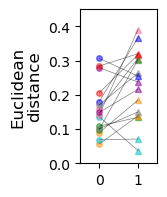

In [150]:
# List of colors to cycle through
colors = ['red','#FF6599', '#FF8E00', 'blue', '#008E00', '#00C0C0', 'gray', '#8E008E',
          'red','#FF6599', '#FF8E00', 'blue', '#008E00', '#00C0C0', 'gray', '#8E008E']

plt.figure(figsize=(1, 2))

# Plot lines with dots and triangles
for i in range(len(sp1)):
    bef_af = np.array([sp1[i], sp2[i]])
    color = colors[i % len(colors)]  # Cycle through colors
    plt.plot([0], [bef_af[0]], markersize=4, marker='o', color=color, alpha=0.5)  # Dots for the first column
    plt.plot([1], [bef_af[1]], markersize=4, marker='^', color=color, alpha=0.5)  # Triangles for the second column
    plt.plot([0, 1], bef_af, color='k', alpha=0.5, linewidth=0.5)  # Line connecting the points

plt.xlim(-0.5, 1.5)
plt.ylim(0, 0.45)
plt.ylabel('Euclidean\ndistance', fontsize=12)
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\spread_me.png', dpi=300, bbox_inches='tight')
plt.show()

In [109]:
'''To compare two non-parametric dependent samples, you can use the Wilcoxon signed-rank test. This test is a non-parametric alternative to the paired t-test and is used to compare two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ.'''

'To compare two non-parametric dependent samples, you can use the Wilcoxon signed-rank test. This test is a non-parametric alternative to the paired t-test and is used to compare two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ.'

In [110]:
from scipy.stats import wilcoxon

In [111]:
# Perform Wilcoxon signed-rank test
stat, p = wilcoxon(sp1, sp2)

print(f'p={p:.3f}')

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

p=0.013
Different distribution (reject H0)


md bw centroids

In [118]:
# MD_x = [D_ab_x, D_ac_x, D_ad_x, D_bc_x, D_bd_x, D_cd_x]

MD_x_all = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\\S{Session}\\{mouse}_S{Session}_MD_centroids.pkl', 'rb') as f:
        MD_x = pickle.load(f)
        MD_x_all.append(MD_x)

In [119]:
MD_x_all = np.array(MD_x_all)
MD_x_all.shape

(8, 6)

In [120]:
# we need 0,5,1,4
MD_x_all = MD_x_all[:,[0,5,1,4]]
MD_x_all.shape

(8, 4)

In [121]:
for dat in [MD_x_all[:,0],MD_x_all[:,1],MD_x_all[:,2],MD_x_all[:,3]]:
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(dat, 'norm')
    if p > 0.05:
        print(f"Distr is normal, p = {p:.3f}")
    else:
        print(f"Dist is NOT normal, p = {p:.3f}")

Dist is NOT normal, p = 0.004
Dist is NOT normal, p = 0.012
Dist is NOT normal, p = 0.004
Dist is NOT normal, p = 0.003


In [122]:
from scipy.stats import kruskal
import scikit_posthocs as sp

In [124]:
# Perform Kruskal-Wallis H Test
stat, p = kruskal(MD_x_all[:,0],MD_x_all[:,1],MD_x_all[:,2],MD_x_all[:,3])
print('Kruskal-Wallis H Test:')
print('p=%.3f' % (p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

    # If significant, perform post-hoc analysis
    data = [MD_x_all[:,0],MD_x_all[:,1],MD_x_all[:,2],MD_x_all[:,3]]
    data = np.array(data).T  # Transpose for pairwise comparison
    
    # Perform Dunn's test
    posthoc = sp.posthoc_dunn(data, p_adjust='bonferroni')
    print('\nPost-hoc Dunn\'s Test:')
    print(posthoc)

Kruskal-Wallis H Test:
p=0.204
Same distribution (fail to reject H0)


In [129]:
MD_x_all[:,0].shape

(8,)

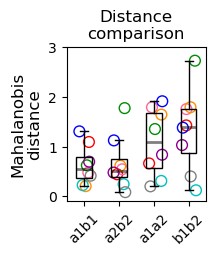

In [137]:
# Sample data
data = [MD_x_all[:,0],MD_x_all[:,1],MD_x_all[:,2],MD_x_all[:,3]]
labels = ['a1b1','a2b2','a1a2','b1b2']
median_colors = ['k','k','k','k']
colors = ['white', 'white','white','white']

# Create the box plot
plt.figure(figsize=(1.8,2))
box = plt.boxplot(data, patch_artist=True,showfliers=False)

# Apply custom colors to each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor('none')
    patch.set_alpha(1) 
    patch.set_edgecolor('black') 

# Change the color of the median lines
for median, median_color  in zip(box['medians'],median_colors):
    median.set_color('k')
    median.set_alpha(0.5)
    median.set_linewidth(2) 

# Define marker types
m_colors = ['red','#FF6599', '#FF8E00', 'blue', '#008E00', '#00C0C0', 'gray', '#8E008E']

# Overlay the data points directly on the x-axis with different marker types
for i, d in enumerate(data, start=1):
    for idx, y in enumerate(d):
        jittered_x = i + np.random.uniform(-0.25, 0.25)
        plt.scatter(jittered_x, y, s=60, alpha=1, facecolor='none',edgecolor=m_colors[idx % len(m_colors)], linewidth=1)

# Add titles and labels
plt.title('Distance\ncomparison')
plt.ylabel('Mahalanobis\ndistance', fontsize=12)
plt.ylim(-0.1,3)
plt.xticks([1, 2,3,4], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\distances_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

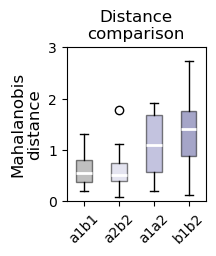

In [128]:
# Sample data
data = [MD_x_all[:,0],MD_x_all[:,1],MD_x_all[:,2],MD_x_all[:,3]]
labels = ['a1b1','a2b2','a1a2','b1b2']
colors = ['gray', '#CACAE3','#8888C0', '#4D4D93']

# Create the box plot
plt.figure(figsize=(1.8,2))
boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width

# Add horizontal and vertical lines
# plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
# plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)

# Add titles and labels
plt.title('Distance\ncomparison')
plt.ylabel('Mahalanobis\ndistance', fontsize=12)
plt.ylim(0,3)
plt.xticks([1, 2,3,4], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\distances_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## a/a/a b/b/b

In [29]:
s_aaabbb = [21,22]
m_aaabbb = ['3C290','3C290']

classifiers

In [30]:
acc12 = []
pval12 = []

acc23 = []
pval23 = []

acc13 = []
pval13 = []

for i in range(len(s_aaabbb)):
    mouse = m_aaabbb[i]
    Session = s_aaabbb[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\s{Session}\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)

        
        acc12.append(classifiers_results['svm']['acc12'])
        pval12.append(classifiers_results['svm']['pval12'])

        acc23.append(classifiers_results['svm']['acc23'])
        pval23.append(classifiers_results['svm']['pval23'])

        acc13.append(classifiers_results['svm']['acc13'])
        pval13.append(classifiers_results['svm']['pval13'])    

In [31]:
acc12 = np.array(acc12)
pval12 = np.array(pval12)

acc13 = np.array(acc13)
pval13 = np.array(pval13)

acc23 = np.array(acc23)
pval23 = np.array(pval23)

In [32]:
acc23.shape

(2,)

In [27]:
s = [45,46,11,13,14,19,20]
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']

In [23]:
acc12_ctrl = []
pval12_ctrl = []

acc23_ctrl = []
pval23_ctrl = []

acc13_ctrl = []
pval13_ctrl = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\s{Session}\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)

        
        acc12_ctrl.append(classifiers_results['svm']['acc12'])
        pval12_ctrl.append(classifiers_results['svm']['pval12'])

        acc23_ctrl.append(classifiers_results['svm']['acc23'])
        pval23_ctrl.append(classifiers_results['svm']['pval23'])

        acc13_ctrl.append(classifiers_results['svm']['acc13'])
        pval13_ctrl.append(classifiers_results['svm']['pval13'])    

In [24]:
acc12_ctrl = np.array(acc12_ctrl)
pval12_ctrl = np.array(pval12_ctrl)

acc13_ctrl = np.array(acc13_ctrl)
pval13_ctrl = np.array(pval13_ctrl)

acc23_ctrl = np.array(acc23_ctrl)
pval23_ctrl = np.array(pval23_ctrl)

In [33]:
acc12.shape, acc12_ctrl.shape

((2,), (7,))

In [35]:
np.sum(pval12_ctrl<0.05), np.sum(pval23_ctrl<0.05),np.sum(pval13_ctrl<0.05)

(3, 7, 7)

In [36]:
np.sum(pval12<0.05), np.sum(pval23<0.05),np.sum(pval13<0.05)

(1, 0, 1)

In [185]:
colors = ['#588c7e', '#d96459', '#ffcc5c'] #12 23 13 

In [206]:
bl_or = ['#1F77B4', '#FF8113']

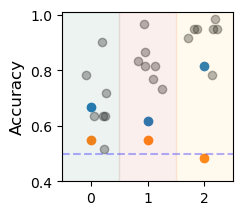

In [229]:
plt.figure(figsize=(2.2, 2.2))
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.3)
#12
plt.scatter(np.random.uniform(-0.3, 0.3, len(acc12_ctrl)), acc12_ctrl, color='k', alpha=0.3)
plt.scatter([0], acc12[1], color=bl_or[0], alpha=1)
plt.scatter([0], acc12[0], color=bl_or[1], alpha=1)
#23
plt.scatter(np.random.uniform(-0.3, 0.3, len(acc23_ctrl))+1, acc23_ctrl, color='k', alpha=0.3)
plt.scatter([1], acc23[1], color=bl_or[0], alpha=1)
plt.scatter([1], acc23[0], color=bl_or[1], alpha=1)
#13
plt.scatter(np.random.uniform(-0.3, 0.3, len(acc13_ctrl))+2, acc13_ctrl, color='k', alpha=0.3)
plt.scatter([2], acc13[1], color=bl_or[0], alpha=1)
plt.scatter([2], acc13[0], color=bl_or[1], alpha=1)


plt.axvspan(-0.5,0.5,color=colors[0], alpha=0.1)
plt.axvspan(0.5,1.5,color=colors[1], alpha=0.1)
plt.axvspan(1.5,2.5,color=colors[2], alpha=0.1)

plt.xlim(-0.5,2.5)
plt.ylim(0.4,1.01)

plt.ylabel('Accuracy',  fontsize=12)
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\acc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

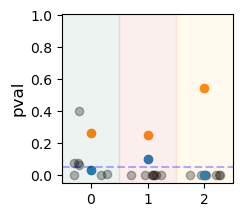

In [231]:
plt.figure(figsize=(2.2, 2.2))
plt.axhline(0.05, color='blue', linestyle='--', alpha=0.3)
#12
plt.scatter(np.random.uniform(-0.3, 0.3, len(pval12_ctrl)), pval12_ctrl, color='k', alpha=0.3)
plt.scatter([0], pval12[1], color=bl_or[0], alpha=1)
plt.scatter([0], pval12[0], color=bl_or[1], alpha=1)
#23
plt.scatter(np.random.uniform(-0.3, 0.3, len(pval12_ctrl))+1, pval23_ctrl, color='k', alpha=0.3)
plt.scatter([1], pval23[1], color=bl_or[0], alpha=1)
plt.scatter([1], pval23[0], color=bl_or[1], alpha=1)
#13
plt.scatter(np.random.uniform(-0.3, 0.3, len(pval12_ctrl))+2, pval13_ctrl, color='k', alpha=0.3)
plt.scatter([2], pval13[1], color=bl_or[0], alpha=1)
plt.scatter([2], pval13[0], color=bl_or[1], alpha=1)


plt.axvspan(-0.5,0.5,color=colors[0], alpha=0.1)
plt.axvspan(0.5,1.5,color=colors[1], alpha=0.1)
plt.axvspan(1.5,2.5,color=colors[2], alpha=0.1)

plt.xlim(-0.5,2.5)
plt.ylim(-0.05,1.01)

plt.ylabel('pval',  fontsize=12)
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\pval_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

distances

In [37]:
D_x_all = []
for i in range(len(s_aaabbb)):
    mouse = m_aaabbb[i]
    Session = s_aaabbb[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\s{Session}\\{mouse}_S{Session}_MD_centroids.pkl', 'rb') as f:
        D_x = pickle.load(f) 
        D_x_all.append(D_x)

In [38]:
p_x_all = []
for i in range(len(s_aaabbb)):
    mouse = m_aaabbb[i]
    Session = s_aaabbb[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\s{Session}\\{mouse}_S{Session}_pvals.pkl', 'rb') as f:
        p_x = pickle.load(f) 
        p_x_all.append(p_x)

In [39]:
D_x_all = np.array(D_x_all)
D_x_all.shape

(2, 3)

In [40]:
p_x_all = np.array(p_x_all)
p_x_all.shape

(2, 3)

In [41]:
D_x_all_ctrl = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\s{Session}\\{mouse}_S{Session}_MD_centroids.pkl', 'rb') as f:
        D_x_ctrl = pickle.load(f) 
        D_x_all_ctrl.append(D_x_ctrl) 

In [42]:
p_x_all_ctrl = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\s{Session}\\{mouse}_S{Session}_pvals.pkl', 'rb') as f:
        p_x_ctrl = pickle.load(f) 
        p_x_all_ctrl.append(p_x_ctrl)

In [43]:
D_x_all_ctrl = np.array(D_x_all_ctrl)
p_x_all_ctrl = np.array(p_x_all_ctrl)
D_x_all_ctrl.shape, p_x_all_ctrl.shape

((7, 3), (7, 3))

In [44]:
p_x_all

array([[0.926, 0.39 , 0.408],
       [0.306, 0.232, 0.   ]])

In [45]:
p_x_all_ctrl

array([[0.312, 0.   , 0.   ],
       [0.106, 0.   , 0.   ],
       [0.   , 0.046, 0.   ],
       [0.988, 0.   , 0.   ],
       [0.832, 0.   , 0.   ],
       [0.13 , 0.   , 0.   ],
       [0.062, 0.058, 0.   ]])

In [46]:
np.sum(p_x_all_ctrl[:,0]<0.05), np.sum(p_x_all_ctrl[:,1]<0.05),np.sum(p_x_all_ctrl[:,2]<0.05)

(1, 6, 7)

In [47]:
np.sum(p_x_all[:,0]<0.05), np.sum(p_x_all[:,1]<0.05),np.sum(p_x_all[:,2]<0.05)

(0, 0, 1)

In [ ]:
colors = ['#588c7e', '#d96459', '#ffcc5c'] #12 23 13 

In [ ]:
bl_or = ['#1F77B4', '#FF8113']

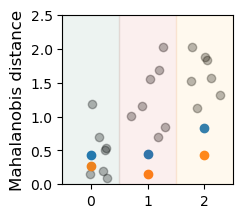

In [243]:
plt.figure(figsize=(2.2, 2.2))
#12
plt.scatter(np.random.uniform(-0.3, 0.3, len(D_x_all_ctrl)), D_x_all_ctrl[:,0], color='k', alpha=0.3)
plt.scatter([0], D_x_all[1,0], color=bl_or[0], alpha=1)
plt.scatter([0], D_x_all[0,0], color=bl_or[1], alpha=1)
#23
plt.scatter(np.random.uniform(-0.3, 0.3, len(D_x_all_ctrl))+1, D_x_all_ctrl[:,1], color='k', alpha=0.3)
plt.scatter([1], D_x_all[1,1], color=bl_or[0], alpha=1)
plt.scatter([1], D_x_all[0,1], color=bl_or[1], alpha=1)
#13
plt.scatter(np.random.uniform(-0.3, 0.3, len(D_x_all_ctrl))+2, D_x_all_ctrl[:,2], color='k', alpha=0.3)
plt.scatter([2], D_x_all[1,2], color=bl_or[0], alpha=1)
plt.scatter([2], D_x_all[0,2], color=bl_or[1], alpha=1)


plt.axvspan(-0.5,0.5,color=colors[0], alpha=0.1)
plt.axvspan(0.5,1.5,color=colors[1], alpha=0.1)
plt.axvspan(1.5,2.5,color=colors[2], alpha=0.1)

plt.xlim(-0.5,2.5)
plt.ylim(0,2.5)

plt.ylabel('Mahalanobis distance',  fontsize=12)
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\MDx_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

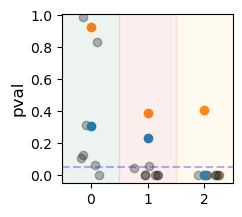

In [245]:
plt.figure(figsize=(2.2, 2.2))
plt.axhline(0.05, color='blue', linestyle='--', alpha=0.3)
#12
plt.scatter(np.random.uniform(-0.3, 0.3, len(p_x_all_ctrl)), p_x_all_ctrl[:,0], color='k', alpha=0.3)
plt.scatter([0], p_x_all[1,0], color=bl_or[0], alpha=1)
plt.scatter([0], p_x_all[0,0], color=bl_or[1], alpha=1)
#23
plt.scatter(np.random.uniform(-0.3, 0.3, len(p_x_all_ctrl))+1, p_x_all_ctrl[:,1], color='k', alpha=0.3)
plt.scatter([1], p_x_all[1,1], color=bl_or[0], alpha=1)
plt.scatter([1], p_x_all[0,1], color=bl_or[1], alpha=1)
#13
plt.scatter(np.random.uniform(-0.3, 0.3, len(p_x_all_ctrl))+2, p_x_all_ctrl[:,2], color='k', alpha=0.3)
plt.scatter([2], p_x_all[1,2], color=bl_or[0], alpha=1)
plt.scatter([2], p_x_all[0,2], color=bl_or[1], alpha=1)


plt.axvspan(-0.5,0.5,color=colors[0], alpha=0.1)
plt.axvspan(0.5,1.5,color=colors[1], alpha=0.1)
plt.axvspan(1.5,2.5,color=colors[2], alpha=0.1)

plt.xlim(-0.5,2.5)
plt.ylim(-0.05,1.01)

plt.ylabel('pval',  fontsize=12)
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\px_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Taking out

In [21]:
s = [45,46,11,13,14,19,20]
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']

In [22]:
SVM_take_out_dic_list = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\S{Session}\\{mouse}_S{Session}_SVM_take_out_dic.pkl', 'rb') as f:
        SVM_take_out_dic = pickle.load(f) 
        SVM_take_out_dic_list.append(SVM_take_out_dic) 

In [12]:
SVM_take_out_dic_list[0].keys()

dict_keys(['SVM_s_vs_bl', 'SVM_a_vs_b', 'tSVM_s_vs_bl', 'tSVM_a_vs_b'])

In [23]:
len(SVM_take_out_dic_list)

7

In [17]:
colors = ['#800080', '#FF6347']

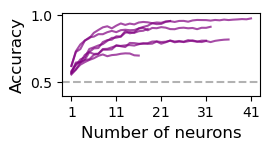

In [38]:
plt.figure(figsize=(2.8,1.6)) 
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3)
for i in range(len(s)):
    x = np.array(SVM_take_out_dic_list[i]['SVM_s_vs_bl'])
    x = np.flip(x)
    plt.plot(x, color=colors[0], alpha=0.7)
plt.ylim(0.4,1.01)
plt.xlabel('Number of neurons',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.xticks(np.arange(0,41,10), labels=np.arange(1,42,10), fontsize=10)
plt.tight_layout()
plt.show()

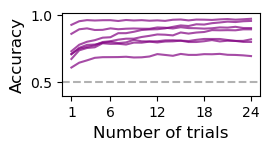

In [41]:
plt.figure(figsize=(2.8,1.6)) 
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3)
for i in range(len(s)):
    x = np.array(SVM_take_out_dic_list[i]['tSVM_s_vs_bl'])
    x = np.flip(x)
    plt.plot(x, color=colors[0], alpha=0.7)
plt.ylim(0.4,1.01)
plt.xlabel('Number of trials',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.xticks([0,5,11,17,23], labels=[ 1,  6, 12, 18, 24], fontsize=10)
plt.tight_layout()
plt.show()

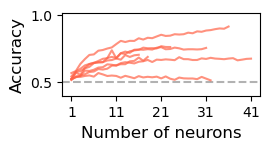

In [40]:
plt.figure(figsize=(2.8,1.6)) 
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3)
for i in range(len(s)):
    x = np.array(SVM_take_out_dic_list[i]['SVM_a_vs_b'])
    x = np.flip(x)
    plt.plot(x, color=colors[1], alpha=0.7)
plt.ylim(0.4,1.01)
plt.xlabel('Number of neurons',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.xticks(np.arange(0,41,10), labels=np.arange(1,42,10), fontsize=10)
plt.tight_layout()
plt.show()

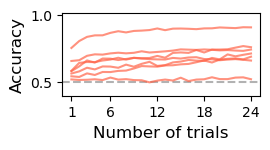

In [39]:
plt.figure(figsize=(2.8,1.6)) 
plt.axhline(0.5, color='k', linestyle='--', alpha=0.3)
for i in range(len(s)):
    x = np.array(SVM_take_out_dic_list[i]['tSVM_a_vs_b'])
    x = np.flip(x)
    plt.plot(x, color=colors[1], alpha=0.7)
plt.ylim(0.4,1.01)
plt.xlabel('Number of trials',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.xticks([0,5,11,17,23], labels=[ 1,  6, 12, 18, 24], fontsize=10)
plt.tight_layout()
plt.show()

In [42]:
sh_SVM_take_out_dic_list = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\S{Session}\\{mouse}_S{Session}_sh_dic.pkl', 'rb') as f:
        sh_SVM_take_out_dic = pickle.load(f) 
        sh_SVM_take_out_dic_list.append(sh_SVM_take_out_dic) 

In [43]:
sh_SVM_take_out_dic_list[0]['sh_neurons_sbl_list']

[[0.4606666666666667,
  0.4676666666666667,
  0.4653333333333334,
  0.47266666666666657,
  0.474,
  0.4638333333333333,
  0.4738333333333334,
  0.4763333333333334,
  0.461,
  0.4695,
  0.4628333333333333,
  0.4771666666666667,
  0.46866666666666673,
  0.4700000000000001,
  0.4701666666666667,
  0.4715,
  0.4693333333333334,
  0.4681666666666668,
  0.4743333333333333,
  0.4721666666666667,
  0.47900000000000004,
  0.491,
  0.4873333333333333],
 [0.4531666666666666,
  0.43733333333333335,
  0.45233333333333337,
  0.4495,
  0.45199999999999996,
  0.4681666666666667,
  0.4760000000000001,
  0.4743333333333334,
  0.4555,
  0.4763333333333334,
  0.4699999999999999,
  0.47050000000000003,
  0.4724999999999999,
  0.45350000000000007,
  0.47850000000000004,
  0.47950000000000004,
  0.48449999999999993,
  0.479,
  0.48200000000000004,
  0.4806666666666666,
  0.49216666666666675,
  0.49366666666666675,
  0.4978333333333333],
 [0.4743333333333334,
  0.4785000000000001,
  0.4803333333333334,
  0.49

In [76]:
dic_keys = list(SVM_take_out_dic_list[0].keys())
dic_keys

['SVM_s_vs_bl', 'SVM_a_vs_b', 'tSVM_s_vs_bl', 'tSVM_a_vs_b']

In [77]:
sh_dic_keys = list(sh_SVM_take_out_dic_list[0].keys())
sh_dic_keys

['sh_neurons_sbl_list',
 'sh_neurons_ab_list',
 'sh_trials_sbl_list',
 'sh_trils_ab_list']

In [78]:
from scipy.stats import percentileofscore

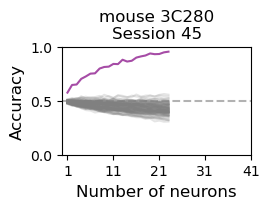

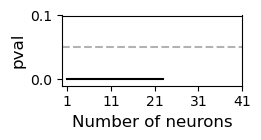

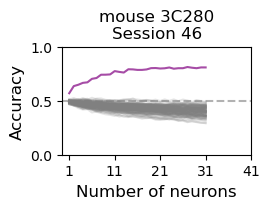

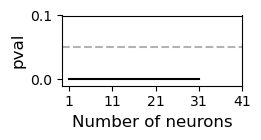

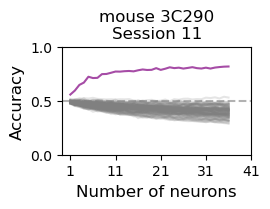

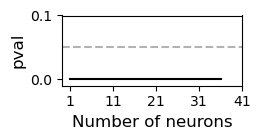

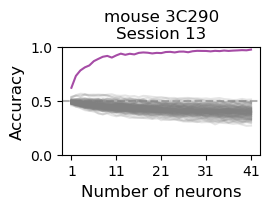

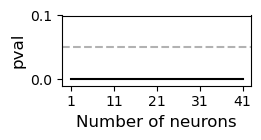

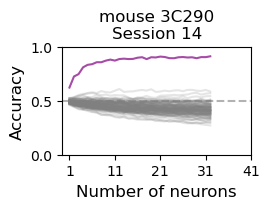

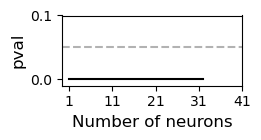

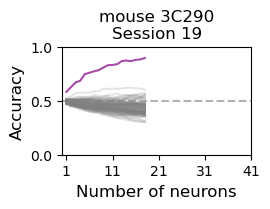

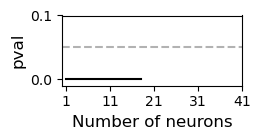

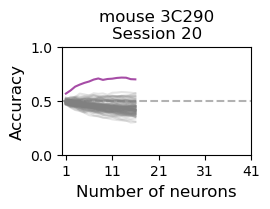

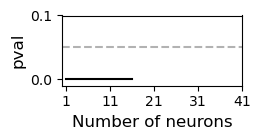

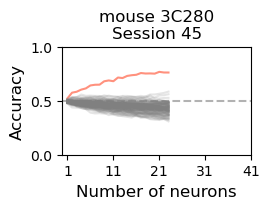

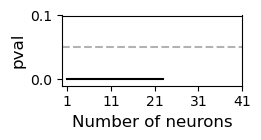

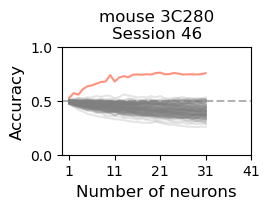

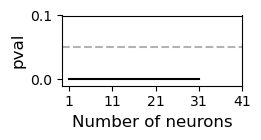

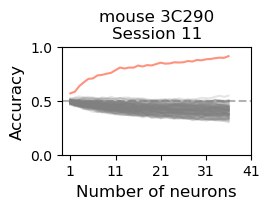

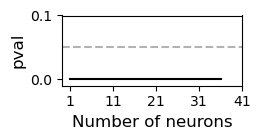

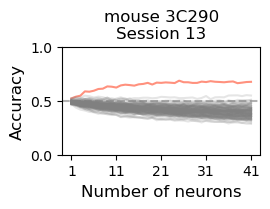

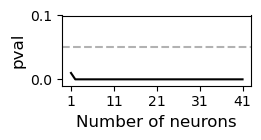

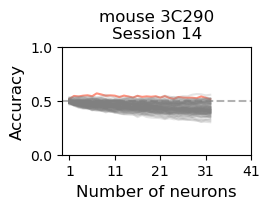

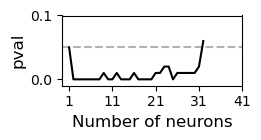

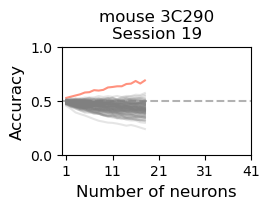

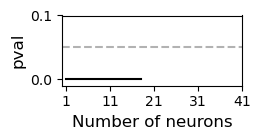

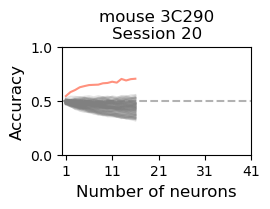

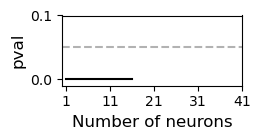

In [90]:
# neurons
for model in range(2):
    for ses_i in range(len(s)):

        plt.figure(figsize=(2.8,2.2)) 
        plt.axhline(0.5, color='k', linestyle='--', alpha=0.3)

        x = np.array(SVM_take_out_dic_list[ses_i][dic_keys[model]])
        x = np.flip(x)
        plt.plot(x, color=colors[model], alpha=0.7)

        for sh in range(100):
            y = np.array(sh_SVM_take_out_dic_list[ses_i][sh_dic_keys[model]][sh])
            y = np.flip(y)
            plt.plot(y, color='gray', alpha=0.2)

        plt.ylim(0,1.0)
        plt.xlabel('Number of neurons',  fontsize=12)
        plt.ylabel('Accuracy',  fontsize=12)
        plt.xticks(np.arange(0,41,10), labels=np.arange(1,42,10), fontsize=10)
        plt.title(f'mouse {m[ses_i]}\nSession {s[ses_i]}')
        plt.tight_layout()
        plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\s{s[ses_i]}_{dic_keys[model]}_neurons.png', dpi=300, bbox_inches='tight')
        plt.show()

        # stats
        sh_matrix = np.array(sh_SVM_take_out_dic_list[ses_i][sh_dic_keys[model]]) # ex (100, 23)

        p_vals_session_x = []

        for case in range(len(SVM_take_out_dic_list[ses_i][dic_keys[model]])):
            real_acc = SVM_take_out_dic_list[ses_i][dic_keys[model]][case]
            sh_acc_distr = sh_matrix[:,case]
            # stats
            sh_acc_distr_sorted = np.sort(np.array(sh_acc_distr))
            percentile_rank = percentileofscore(sh_acc_distr_sorted, real_acc)
            # one-tailored
            p_value = 1-(percentile_rank/100)
            p_vals_session_x.append(p_value)

        plt.figure(figsize=(2.8,1.5)) 
        plt.axhline(0.05, color='k', linestyle='--', alpha=0.3)
        plt.plot(np.flip(np.array(p_vals_session_x)), color='k')
        plt.xlabel('Number of neurons',  fontsize=12)
        plt.ylabel('pval',  fontsize=12)
        plt.xticks(np.arange(0,41,10), labels=np.arange(1,42,10), fontsize=10)
        plt.ylim(-0.01, 0.1)
        plt.tight_layout()
        plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\s{s[ses_i]}_{dic_keys[model]}_neurons_pvals.png', dpi=300, bbox_inches='tight')
        plt.show()




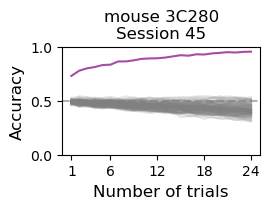

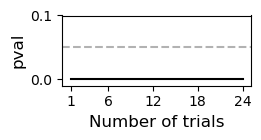

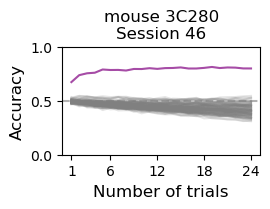

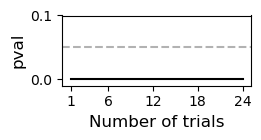

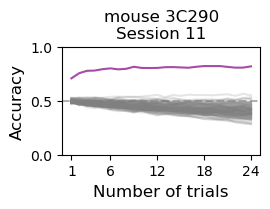

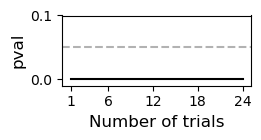

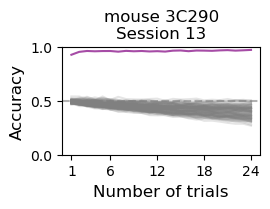

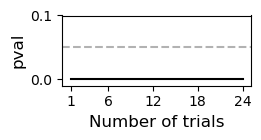

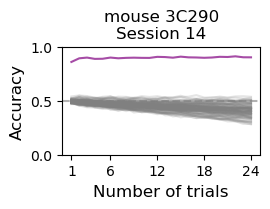

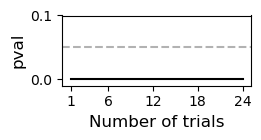

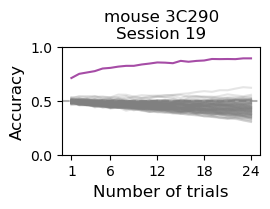

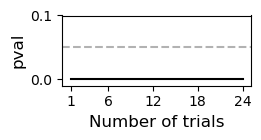

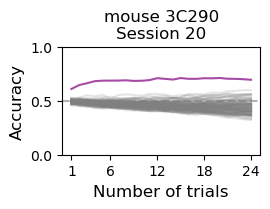

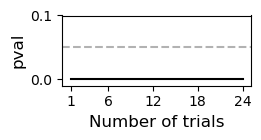

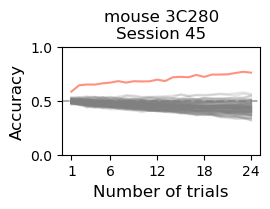

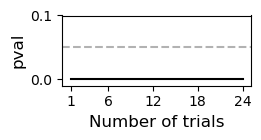

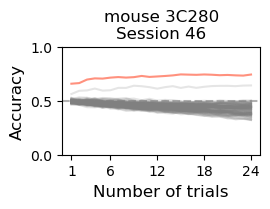

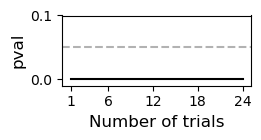

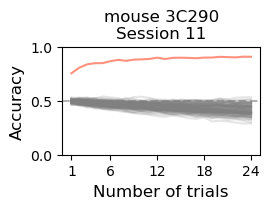

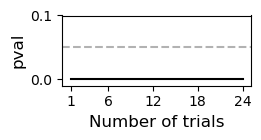

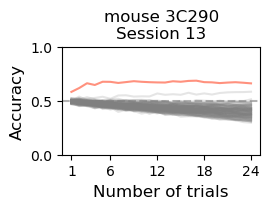

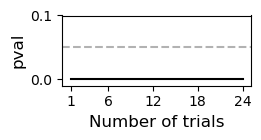

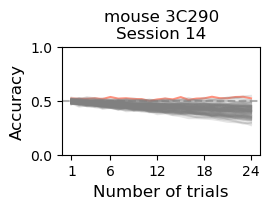

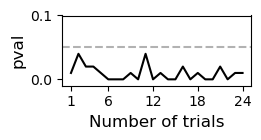

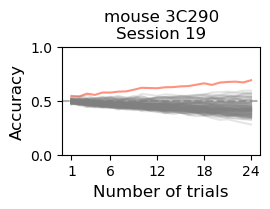

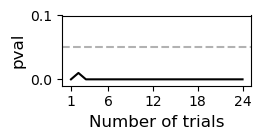

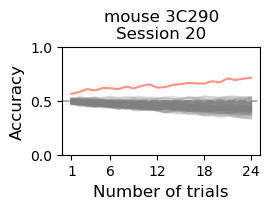

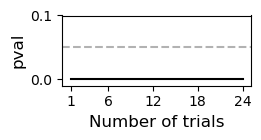

In [89]:
# trials
for model in [2,3]:
    for ses_i in range(len(s)):

        plt.figure(figsize=(2.8,2.2)) 
        plt.axhline(0.5, color='k', linestyle='--', alpha=0.3)

        x = np.array(SVM_take_out_dic_list[ses_i][dic_keys[model]])
        x = np.flip(x)
        plt.plot(x, color=colors[model-2], alpha=0.7)

        for sh in range(100):
            y = np.array(sh_SVM_take_out_dic_list[ses_i][sh_dic_keys[model]][sh])
            y = np.flip(y)
            plt.plot(y, color='gray', alpha=0.2)

        plt.ylim(0,1.0)
        plt.xlabel('Number of trials',  fontsize=12)
        plt.ylabel('Accuracy',  fontsize=12)
        plt.xticks([0,5,11,17,23], labels=[ 1,  6, 12, 18, 24], fontsize=10)
        plt.title(f'mouse {m[ses_i]}\nSession {s[ses_i]}')
        plt.tight_layout()
        plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\s{s[ses_i]}_{dic_keys[model]}_trials.png', dpi=300, bbox_inches='tight')
        plt.show()

        # stats
        sh_matrix = np.array(sh_SVM_take_out_dic_list[ses_i][sh_dic_keys[model]]) # ex (100, 23)

        p_vals_session_x = []

        for case in range(len(SVM_take_out_dic_list[ses_i][dic_keys[model]])):
            real_acc = SVM_take_out_dic_list[ses_i][dic_keys[model]][case]
            sh_acc_distr = sh_matrix[:,case]
            # stats
            sh_acc_distr_sorted = np.sort(np.array(sh_acc_distr))
            percentile_rank = percentileofscore(sh_acc_distr_sorted, real_acc)
            # one-tailored
            p_value = 1-(percentile_rank/100)
            p_vals_session_x.append(p_value)

        plt.figure(figsize=(2.8,1.5)) 
        plt.axhline(0.05, color='k', linestyle='--', alpha=0.3)
        plt.plot(np.flip(np.array(p_vals_session_x)), color='k')
        plt.ylim(-0.01, 0.1)
        plt.xlabel('Number of trials',  fontsize=12)
        plt.ylabel('pval',  fontsize=12)
        plt.xticks([0,5,11,17,23], labels=[ 1,  6, 12, 18, 24], fontsize=10)
        plt.tight_layout()
        plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\s{s[ses_i]}_{dic_keys[model]}_trials_pvals.png', dpi=300, bbox_inches='tight')
        plt.show()

In [68]:
from scipy.stats import percentileofscore

In [73]:
p_vals_neurons_sbl_all = []
for ses_i in range(len(s)):
    sh_matrix = np.array(sh_SVM_take_out_dic_list[ses_i]['sh_neurons_sbl_list']) # ex (100, 23)

    p_vals_session_x = []

    for case in range(len(SVM_take_out_dic_list[ses_i]['SVM_s_vs_bl'])):
        real_acc = SVM_take_out_dic_list[ses_i]['SVM_s_vs_bl'][case]
        sh_acc_distr = sh_matrix[:,case]
        # stats
        sh_acc_distr_sorted = np.sort(np.array(sh_acc_distr))
        percentile_rank = percentileofscore(sh_acc_distr_sorted, real_acc)
        # one-tailored
        p_value = 1-(percentile_rank/100)
        p_vals_session_x.append(p_value)
    p_vals_neurons_sbl_all.append(p_vals_session_x)

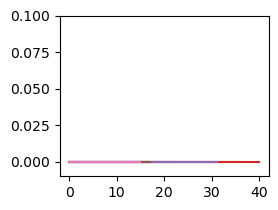

In [75]:
plt.figure(figsize=(2.8,2.2)) 
for ses_i in range(len(s)):
    plt.plot(p_vals_neurons_sbl_all[ses_i])
plt.ylim(-0.01,0.1)
plt.tight_layout()
plt.show()

In [67]:
np.array(sh_SVM_take_out_dic_list[0]['sh_neurons_sbl_list']).shape

(100, 23)